<a href="https://colab.research.google.com/github/mirzanaeembeg/Python-Cheat-Sheet-ML-DL-AI/blob/main/3_Pandas_Data_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complete Python Cheat Sheet for Machine Learning, Deep Learning & AI

## Table of Contents
1. [Python Fundamentals](https://colab.research.google.com/drive/1linKYA8PHgnMb4ugYkClIWu0_7SdfLtk#1-python-fundamentals=)
2. [NumPy - Numerical Computing](https://colab.research.google.com/drive/1qZFirXOdQtbtfCdJPtT9RU-FshLo9qLH?usp=sharing)
3. [Pandas - Data Manipulation](https://colab.research.google.com/drive/18QZJEVNTCqfHAATjvYZZy4e-gcDmKpMk)
4. [Matplotlib & Seaborn - Data Visualization](#4-matplotlib--seaborn---data-visualization)
5. [Scikit-learn - Machine Learning](#5-scikit-learn---machine-learning)
6. [TensorFlow & Keras - Deep Learning](#6-tensorflow--keras---deep-learning)
7. [PyTorch - Deep Learning](#7-pytorch---deep-learning)
8. [Data Preprocessing](#8-data-preprocessing)
9. [Model Evaluation & Metrics](#9-model-evaluation--metrics)
10. [Advanced Topics](#10-advanced-topics)
11. [Best Practices](#11-best-practices)
12. [Resources & Further Learning](#12-resources--further-learning)

* * *

# 3. Pandas - Data Manipulation
---
---

### Overview

This document serves as a comprehensive guide and practical cheat sheet for various operations in the Pandas library. It covers essential data manipulation, cleaning, analysis, and preparation techniques, along with more advanced functionalities, organized into the following key sections:

**3.1 Installation & Import:** This section demonstrates importing necessary libraries like pandas, numpy, datetime, and random. It also includes code to create sample datasets (df, df2, df_ts) for subsequent operations.

**3.2 Data Structures:** This section introduces Pandas Series and DataFrames, showing how to create them and access basic properties like values, index, dtype, shape, and size. It also demonstrates using df.info() and df.describe() for DataFrame summaries.

**3.3 Reading & Writing Data:** This section covers reading data from and writing data to various file formats including CSV, Excel, JSON, and others like Parquet and Pickle. It shows different options for reading and writing data.

**3.4 Data Inspection:** This section focuses on examining data using functions like head(), tail(), sample(), info(), describe(), dtypes, columns, isnull().sum(), and nunique(). It also briefly touches upon changing data types.

**3.5 Data Selection & Indexing:** This section demonstrates selecting data by column name (single or multiple), by position (iloc), by index label (loc), and using boolean indexing for filtering rows based on conditions. It also shows advanced selection with .loc and .iloc for combined row/column selection, and .at/.iat for single value access.

**3.6 Data Cleaning:** This section covers handling missing values (isnull(), notnull(), isnull().sum(), dropna(), fillna(), interpolate()) and handling duplicate rows (duplicated(), drop_duplicates()). It also demonstrates various string operations using the .str accessor (lower, upper, title, strip, replace, contains, startswith, endswith, len, split, extract).

**3.7 Data Transformation:** This section shows how to add and modify columns using arithmetic operations, .apply() with lambda functions, np.where() for conditional assignment, and the .assign() method. It also demonstrates conditional modification using .loc.

**3.8 Grouping and Aggregation:** This section explains how to group data using groupby() on single or multiple columns and perform various aggregation functions like sum(), mean(), count(), min(), max(), std(), var(), median(), first(), and last(). It also shows how to perform multiple aggregations simultaneously and custom aggregations using lambda functions. It also includes examples of creating Pivot Tables with pd.pivot_table() and Cross Tabulations with pd.crosstab().

**3.9 Merging and Joining:** This section covers combining DataFrames using concat() for vertical and horizontal concatenation with options for ignoring or adding hierarchical indexes. It also demonstrates merging DataFrames using merge() with different join types (inner, left, right, outer) and joining on index using join().

**3.10 Date and Time Operations:** This section focuses on working with datetime data, showing how to convert columns to datetime objects using pd.to_datetime() with format and error handling options. It also demonstrates extracting datetime properties like year, month, day, weekday, quarter, and checking for weekends using the .dt accessor, and performing time series operations like resampling, rolling, and expanding.

**3.11 Reshaping Data:** This section covers reshaping data between wide and long formats using melt() and pivot_table(). It also demonstrates stacking and unstacking operations to move between different levels of a multi-index.

**3.12 Performance Tips:** This section provides tips for improving performance, including checking and optimizing memory usage by converting data types to smaller representations (int32, float32, category) and using deep=True in memory_usage(). It also suggests using vectorized operations, query(), and eval() for efficient operations and avoiding chained assignments. It also demonstrates reading large files in chunks and using specific columns.

**3.13 Common Patterns for ML:** This section demonstrates preparing data for machine learning, including creating dummy variables for categorical features using pd.get_dummies(), binning continuous variables using pd.cut() and pd.qcut(), and feature scaling using StandardScaler from sklearn. It also shows how to separate features (X) and target (y) and handle missing values in the feature set before model training, and basic data quality checks.

**3.14 Advanced Things:** This section covers several advanced Pandas functionalities. It includes **Advanced Indexing - MultiIndex**, demonstrating `pd.MultiIndex.from_tuples()` and selecting data using multiple levels. It also covers **More Advanced String Operations** using the `.str` accessor with regular expressions for contains, extract, and replace. **Working with Categorical Data** is shown in more depth, including converting to category, accessing categories and codes, and ordering categories. **Method Chaining with `.pipe()`** is demonstrated for creating readable data processing pipelines. **Expanding List-like Entries with `.explode()`** is shown to transform list elements into rows. **Correlation and Autocorrelation** is covered, demonstrating `.corr()` for DataFrame columns and `.autocorr()` and `autocorrelation_plot()` for time series. Finally, **Binning Continuous Data** using `pd.cut()` and `pd.qcut()` is demonstrated with examples.


## 3.1 Installation & Import
---
Terminal Command: `pip install pandas`

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

### Dataset Creation For The Operations in Pandas

In [3]:
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Create a comprehensive sample dataset
def create_sample_dataset():
    """
    Creates a sample dataset with various data types and scenarios
    suitable for testing all pandas operations from the cheat sheet
    """

    # Number of records
    n_records = 1000

    # Generate sample data
    data = {
        # Numeric columns
        'customer_id': range(1, n_records + 1),
        'age': np.random.randint(18, 80, n_records),
        'income': np.random.normal(50000, 15000, n_records),
        'score': np.random.uniform(0, 100, n_records),
        'years_experience': np.random.randint(0, 40, n_records),

        # Categorical columns
        'gender': np.random.choice(['Male', 'Female', 'Other'], n_records, p=[0.45, 0.45, 0.1]),
        'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_records, p=[0.3, 0.4, 0.25, 0.05]),
        'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], n_records),
        'department': np.random.choice(['Sales', 'Marketing', 'Engineering', 'HR', 'Finance'], n_records),
        'product_category': np.random.choice(['Electronics', 'Clothing', 'Books', 'Home', 'Sports'], n_records),

        # String columns with variations
        'name': [f"Person_{i}" for i in range(1, n_records + 1)],
        'email': [f"person{i}@email.com" for i in range(1, n_records + 1)],
        'phone': [f"555-{random.randint(1000, 9999)}" for _ in range(n_records)],

        # Date columns
        'registration_date': pd.date_range('2020-01-01', periods=n_records, freq='D'),
        'last_purchase_date': pd.date_range('2023-01-01', periods=n_records, freq='H'),

        # Boolean column
        'is_active': np.random.choice([True, False], n_records, p=[0.8, 0.2]),

        # Column with mixed data types (will be object type)
        'notes': [f"Note {i}" if i % 10 != 0 else None for i in range(1, n_records + 1)],
    }

    # Create DataFrame
    df = pd.DataFrame(data)

    # Add some missing values for demonstration
    # Make some income values null
    null_indices = np.random.choice(df.index, size=50, replace=False)
    df.loc[null_indices, 'income'] = np.nan

    # Make some score values null
    null_indices = np.random.choice(df.index, size=30, replace=False)
    df.loc[null_indices, 'score'] = np.nan

    # Make some education values null
    null_indices = np.random.choice(df.index, size=20, replace=False)
    df.loc[null_indices, 'education'] = np.nan

    # Add some duplicate rows
    duplicate_rows = df.sample(10).copy()
    df = pd.concat([df, duplicate_rows], ignore_index=True)

    # Add some inconsistent string data
    df.loc[df.sample(20).index, 'city'] = df.loc[df.sample(20).index, 'city'].str.upper()
    df.loc[df.sample(15).index, 'city'] = '  ' + df.loc[df.sample(15).index, 'city'] + '  '

    return df

# Create the dataset
df = create_sample_dataset()

# Display basic information about the dataset
print("=== SAMPLE DATASET CREATED ===")
print(f"Shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
print(df.head())
print(f"\nMissing values:")
print(df.isnull().sum())

# Save to CSV for file operations testing
df.to_csv('sample_dataset.csv', index=False)
print("\n=== Dataset saved as 'sample_dataset.csv' ===")

# Create a second dataset for merging operations
def create_second_dataset():
    """Create a second dataset for merge/join operations"""
    n_records = 200

    data = {
        'customer_id': np.random.choice(range(1, 1001), n_records, replace=False),
        'purchase_amount': np.random.uniform(10, 1000, n_records),
        'discount_applied': np.random.choice([0, 5, 10, 15, 20], n_records),
        'purchase_method': np.random.choice(['Online', 'In-store', 'Phone'], n_records),
        'satisfaction_rating': np.random.randint(1, 6, n_records)
    }

    return pd.DataFrame(data)

df2 = create_second_dataset()
df2.to_csv('purchase_data.csv', index=False)
print("=== Second dataset saved as 'purchase_data.csv' ===")

# Create time series data for date/time operations
def create_time_series_data():
    """Create time series data for testing date/time operations"""
    date_range = pd.date_range('2020-01-01', '2023-12-31', freq='D')

    data = {
        'date': date_range,
        'temperature': np.random.normal(20, 10, len(date_range)),
        'humidity': np.random.uniform(30, 90, len(date_range)),
        'rainfall': np.random.exponential(2, len(date_range)),
        'sales': np.random.poisson(50, len(date_range))
    }

    return pd.DataFrame(data)

df_ts = create_time_series_data()
df_ts.to_csv('time_series_data.csv', index=False)
print("=== Time series dataset saved as 'time_series_data.csv' ===")

print("\n=== ALL SAMPLE DATASETS READY FOR TESTING ===")
print("\nYou can now use these datasets to test all operations from the Pandas cheat sheet:")
print("1. df - Main dataset with various data types and missing values")
print("2. df2 - Second dataset for merge/join operations")
print("3. df_ts - Time series dataset for date/time operations")
print("\nFiles created:")
print("- sample_dataset.csv")
print("- purchase_data.csv")
print("- time_series_data.csv")

# Example usage of some operations from the cheat sheet
print("\n=== EXAMPLE OPERATIONS ===")

# Basic inspection
print("\n1. Basic Data Inspection:")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Missing values
print("\n2. Missing Values:")
print(df.isnull().sum())

# Data types
print("\n3. Data Types:")
print(df.dtypes.value_counts())

# Basic filtering
print("\n4. Sample Filtering:")
high_income = df[df['income'] > 60000]
print(f"Records with income > 60000: {len(high_income)}")

# Grouping
print("\n5. Sample Grouping:")
city_stats = df.groupby('city')['income'].agg(['mean', 'count']).round(2)
print("Average income by city:")
print(city_stats)

# String operations
print("\n6. Sample String Operations:")
print("Cities with inconsistent formatting:")
print(df[df['city'].str.contains('  ', na=False)]['city'].unique())

print("\n=== READY TO TEST ALL PANDAS OPERATIONS! ===")

/tmp/ipython-input-3-247184569.py:38: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'last_purchase_date': pd.date_range('2023-01-01', periods=n_records, freq='H'),


=== SAMPLE DATASET CREATED ===
Shape: (1010, 17)

Column names:
['customer_id', 'age', 'income', 'score', 'years_experience', 'gender', 'education', 'city', 'department', 'product_category', 'name', 'email', 'phone', 'registration_date', 'last_purchase_date', 'is_active', 'notes']

Data types:
customer_id                    int64
age                            int64
income                       float64
score                        float64
years_experience               int64
gender                        object
education                     object
city                          object
department                    object
product_category              object
name                          object
email                         object
phone                         object
registration_date     datetime64[ns]
last_purchase_date    datetime64[ns]
is_active                       bool
notes                         object
dtype: object

First few rows:
   customer_id  age        income      score 

### Example Test Commands:

In [138]:
# After running the dataset generator, you can test operations like:

# Data inspection
df.head()
df.info()
df.describe()

# Missing values
df.isnull().sum()
df.dropna()
# df.fillna(df.mean())

# Filtering
df[df['age'] > 30]
df[df['city'].isin(['New York', 'Chicago'])]

# Grouping
df.groupby('city')['income'].mean()
df.groupby(['city', 'gender'])['score'].agg(['mean', 'count'])

# Merging
pd.merge(df, df2, on='customer_id', how='left')

# Date operations
# df_ts.set_index('date').resample('M').mean()

# String operations
df['city'].str.strip().str.lower()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 1010 non-null   int64         
 1   age                         1010 non-null   float64       
 2   income                      960 non-null    float64       
 3   score                       980 non-null    float64       
 4   years_experience            1010 non-null   float64       
 5   gender                      1010 non-null   object        
 6   education                   990 non-null    object        
 7   city                        976 non-null    object        
 8   department                  1010 non-null   object        
 9   product_category            1010 non-null   object        
 10  name                        1010 non-null   object        
 11  email                       1010 non-null   object      

,city
0,los angeles
1,phoenix
2,chicago
3,new york
4,NaN
...,...
1005,phoenix
1006,los angeles
1007,phoenix
1008,phoenix


## 3.2 Data Structures
---



### Series

In [4]:
# Creating Series
s = pd.Series([1, 2, 3, 4, 5])
s = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s = pd.Series({'a': 1, 'b': 2, 'c': 3})

# Series properties
s_values = s.values        # Get values as numpy array
s_index = s.index         # Get index
s_dtype = s.dtype         # Data type
s_shape = s.shape         # Shape
s_size = s.size          # Number of elements

print("Values:", s_values)
print("Index:", s_index)
print("Data type:", s_dtype)
print("Shape:", s_shape)
print("Size:", s_size)

Values: [1 2 3]
Index: Index(['a', 'b', 'c'], dtype='object')
Data type: int64
Shape: (3,)
Size: 3


### DataFrame

In [17]:
# Creating DataFrames
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df = pd.DataFrame(np.random.randn(3, 4), columns=['A', 'B', 'C', 'D'])
# df = pd.DataFrame(data, index=dates, columns=labels) # Removed to fix the error

# DataFrame properties
df.shape        # (rows, columns)
df.size         # Total elements
df.ndim         # Number of dimensions
df.columns      # Column names
df.index        # Row indices
df.dtypes       # Data types of columns
df.info()       # Concise summary
df.describe()   # Statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       3 non-null      float64
 2   C       3 non-null      float64
 3   D       3 non-null      float64
dtypes: float64(4)
memory usage: 228.0 bytes


,A,B,C,D
count,3.000000,3.000000,3.000000,3.000000
mean,0.452924,0.398335,0.575866,1.400351
std,0.726618,0.156603,0.507547,0.639623
min,-0.007836,0.296994,0.003233,0.661841
25%,0.034110,0.308149,0.378687,1.211508
50%,0.076056,0.319305,0.754140,1.761175
75%,0.683304,0.449005,0.862182,1.769605
max,1.290551,0.578705,0.970223,1.778036


## 3.3 Reading & Writing Data
---



### Reading Files

In [10]:
# Create a dummy CSV file
data = {'col1': [1, 2, 3], 'col2': ['a', 'b', 'c']}
dummy_df = pd.DataFrame(data)
dummy_df.to_csv('dummy_file.csv', index=False)

In [ ]:
# CSV files
df = pd.read_csv('file.csv')
df = pd.read_csv('file.csv', sep=';', header=0, index_col=0)
df = pd.read_csv('file.csv', encoding='utf-8', parse_dates=['date_col'])

# Excel files
df = pd.read_excel('file.xlsx', sheet_name='Sheet1')
df = pd.read_excel('file.xlsx', sheet_name=0)

# JSON files
df = pd.read_json('file.json')
df = pd.read_json('file.json', orient='records')

# SQL databases
df = pd.read_sql('SELECT * FROM table', connection)
df = pd.read_sql_table('table_name', connection)

# Other formats
df = pd.read_parquet('file.parquet')
df = pd.read_pickle('file.pkl')
df = pd.read_html('webpage.html')[0]  # First table

### Writing Files

In [44]:
from sqlite3.dbapi2 import connect
# CSV files
df.to_csv('output.csv', index=False)
df.to_csv('output.csv', sep=';', encoding='utf-8')

# Excel files
df.to_excel('output.xlsx', sheet_name='Sheet1', index=False)

# JSON files
df.to_json('output.json', orient='records')

# Other formats
connection = connect('database.db')
df.to_html('output.html', index=False)
df.to_parquet('output.parquet')
df.to_pickle('output.pkl')
df.to_sql('table_name', connection, if_exists='replace')

print(df.shape)

(1010, 17)


## 3.4 Data Inspection

---



### Basic Information

In [45]:
df.head()           # First 5 rows
df.head(10)         # First 10 rows
df.tail()           # Last 5 rows
df.sample(3)        # Random 3 rows
df.info()           # Data types and non-null counts
df.describe()       # Statistical summary
df.dtypes           # Data types
df.columns.tolist() # Column names as list
df.isnull().sum()   # Count of null values per column
df.nunique()        # Number of unique values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         1010 non-null   int64         
 1   age                 1010 non-null   int64         
 2   income              960 non-null    float64       
 3   score               980 non-null    float64       
 4   years_experience    1010 non-null   int64         
 5   gender              1010 non-null   object        
 6   education           990 non-null    object        
 7   city                976 non-null    object        
 8   department          1010 non-null   object        
 9   product_category    1010 non-null   object        
 10  name                1010 non-null   object        
 11  email               1010 non-null   object        
 12  phone               1010 non-null   object        
 13  registration_date   1010 non-null   datetime64[n

,0
customer_id,1000
age,62
income,950
score,970
years_experience,40
gender,3
education,4
city,6
department,5
product_category,5


### Data Types

In [58]:
# # Check data types
# df.dtypes
# df['column'].dtype

# # Convert data types
# df['column'] = df['column'].astype('int64')
# df['column'] = df['column'].astype('float64')
# df['column'] = df['column'].astype('str')
# df['column'] = pd.to_numeric(df['column'], errors='coerce')
# df['date_col'] = pd.to_datetime(df['date_col'])
# df['category_col'] = df['category_col'].astype('category')

# display(df['A'].dtype) # Using an existing column name

# Convert data types
# df['A'] = df['A'].astype('float64') # 'A' is already float, but demonstrates the syntax
# df['column'] = df['column'].astype('int64') # Commented out to avoid error
# df['column'] = df['column'].astype('str') # Commented out to avoid error
# df['B'] = pd.to_numeric(df['B'], errors='coerce') # Using an existing column name
# df['date_col'] = pd.to_datetime(df['date_col']) # Commented out as 'date_col' doesn't exist
# df['category_col'] = df['category_col'].astype('category') # Commented out as 'category_col' doesn't exist

display(df.dtypes)
#display(df['B']) # Displaying the converted column

,0
customer_id,int64
age,int64
income,float64
score,float64
years_experience,int64
gender,object
education,object
city,object
department,object
product_category,object


## 3.5 Data Selection & Indexing
---



### Column Selection

In [62]:
df['city']                           # Single column (Series)
df[['gender', 'is_active']]                   # Multiple columns (DataFrame)
df.notes                              # Dot notation (if valid identifier)
df.select_dtypes(include=[np.number])  # Select numeric columns
df.select_dtypes(include=['object'])   # Select object columns

# # Examples with existing columns in df:
# display(df['A'])                    # Single column (Series)
# display(df[['A', 'B']])             # Multiple columns (DataFrame)
# display(df.A)                       # Dot notation (if valid identifier)

# display(df.select_dtypes(include=[np.number]))  # Select numeric columns
# display(df.select_dtypes(include=['object']))   # Select object columns

,gender,education,city,department,product_category,name,email,phone,notes
0,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,Note 1
1,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,Note 2
2,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,Note 3
3,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,Note 4
4,Female,Bachelor,NaN,Finance,Books,Person_5,person5@email.com,555-4657,Note 5
...,...,...,...,...,...,...,...,...,...
1005,Female,Bachelor,Phoenix,Finance,Clothing,Person_296,person296@email.com,555-5669,Note 296
1006,Male,High School,Los Angeles,Sales,Sports,Person_747,person747@email.com,555-3564,Note 747
1007,Male,High School,Phoenix,Engineering,Electronics,Person_715,person715@email.com,555-8827,Note 715
1008,Male,Bachelor,Phoenix,Marketing,Books,Person_92,person92@email.com,555-5304,Note 92


### Row Selection

In [73]:
display(df.iloc[0])              # First row by position
display(df.iloc[0:3])            # First 3 rows by position
display(df.iloc[-1])             # Last row by position
display(df.loc[0])    # Row by index label
display(df.loc['start':'end'])   # Rows by index range

,0
customer_id,1
age,56
income,70585.666948
score,93.031888
years_experience,32
gender,Male
education,Master
city,Los Angeles
department,HR
product_category,Electronics


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3


,1009
customer_id,756
age,49
income,28069.460427
score,34.17824
years_experience,9
gender,Male
education,High School
city,Los Angeles
department,Marketing
product_category,Books


,0
customer_id,1
age,56
income,70585.666948
score,93.031888
years_experience,32
gender,Male
education,Master
city,Los Angeles
department,HR
product_category,Electronics


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes


### Boolean Indexing

In [76]:
# df[df['column'] > 5]                           # Filter rows
# df[df['column'].isin(['A', 'B', 'C'])]        # Filter by values
# df[(df['col1'] > 5) & (df['col2'] < 10)]      # Multiple conditions (AND)
# df[(df['col1'] > 5) | (df['col2'] < 10)]      # Multiple conditions (OR)
# df[~df['column'].isin(['A', 'B'])]            # NOT condition
# df.query('column > 5 and other_col < 10')     # Query method

# Filter rows where age is greater than 60
display(df[df['age'] > 60])

# Filter by gender ('Male' or 'Female')
display(df[df['gender'].isin(['Male', 'Female'])])

# Multiple conditions (AND): income > 70000 AND is_active is True
display(df[(df['income'] > 70000) & (df['is_active'] == True)])

# Multiple conditions (OR): age < 25 OR years_experience > 30
display(df[(df['age'] < 25) | (df['years_experience'] > 30)])

# NOT condition: education is NOT 'Bachelor' or 'Master'
display(df[~df['education'].isin(['Bachelor', 'Master'])])

# Query method: score > 80 and city is 'New York'
display(df.query('score > 80 and city == "New York"'))

,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
6,7,78,55136.853770,45.012443,27,Other,High School,Houston,Engineering,Clothing,Person_7,person7@email.com,555-2679,2020-01-07,2023-01-01 06:00:00,True,Note 7
9,10,75,52899.170928,45.061966,3,Female,High School,Phoenix,HR,Books,Person_10,person10@email.com,555-7912,2020-01-10,2023-01-01 09:00:00,True,None
15,16,70,40261.290825,3.802185,24,Male,Bachelor,New York,HR,Books,Person_16,person16@email.com,555-9279,2020-01-16,2023-01-01 15:00:00,False,Note 16
21,22,70,45976.054071,50.857929,25,Male,High School,Phoenix,Sales,Sports,Person_22,person22@email.com,555-8359,2020-01-22,2023-01-01 21:00:00,True,Note 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,461,61,57729.092795,83.815218,21,Female,Master,Los Angeles,Sales,Clothing,Person_461,person461@email.com,555-9099,2021-04-05,2023-01-20 04:00:00,True,Note 461
1002,364,77,51994.042778,75.958241,5,Other,High School,New York,Finance,Electronics,Person_364,person364@email.com,555-7267,2020-12-29,2023-01-16 03:00:00,True,Note 364
1004,469,77,52544.793342,22.022530,27,Other,High School,Chicago,Marketing,Home,Person_469,person469@email.com,555-3881,2021-04-13,2023-01-20 12:00:00,True,Note 469
1007,715,67,18176.660879,60.575530,3,Male,High School,Phoenix,Engineering,Electronics,Person_715,person715@email.com,555-8827,2021-12-15,2023-01-30 18:00:00,True,Note 715


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,Person_5,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,296,19,59350.991584,16.161981,29,Female,Bachelor,Phoenix,Finance,Clothing,Person_296,person296@email.com,555-5669,2020-10-22,2023-01-13 07:00:00,True,Note 296
1006,747,41,63522.119449,73.305119,10,Male,High School,Los Angeles,Sales,Sports,Person_747,person747@email.com,555-3564,2022-01-16,2023-02-01 02:00:00,True,Note 747
1007,715,67,18176.660879,60.575530,3,Male,High School,Phoenix,Engineering,Electronics,Person_715,person715@email.com,555-8827,2021-12-15,2023-01-30 18:00:00,True,Note 715
1008,92,71,38232.321593,96.512974,0,Male,Bachelor,Phoenix,Marketing,Books,Person_92,person92@email.com,555-5304,2020-04-01,2023-01-04 19:00:00,False,Note 92


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
7,8,38,78672.944098,22.696469,5,Female,Bachelor,Phoenix,Finance,Electronics,Person_8,person8@email.com,555-9935,2020-01-08,2023-01-01 07:00:00,True,Note 8
13,14,28,70339.555780,44.327309,10,Other,Master,Los Angeles,Finance,Books,Person_14,person14@email.com,555-4582,2020-01-14,2023-01-01 13:00:00,True,Note 14
25,26,47,88088.866868,97.074996,33,Female,Bachelor,New York,Marketing,Clothing,Person_26,person26@email.com,555-7924,2020-01-26,2023-01-02 01:00:00,True,Note 26
39,40,76,79419.552079,97.599085,16,Other,Master,New York,Marketing,Books,Person_40,person40@email.com,555-8527,2020-02-09,2023-01-02 15:00:00,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,913,71,76613.187562,26.667520,29,Male,High School,New York,Finance,Books,Person_913,person913@email.com,555-7717,2022-07-01,2023-02-08 00:00:00,True,Note 913
947,948,70,70614.642698,71.013543,8,Female,High School,Phoenix,Sales,Home,Person_948,person948@email.com,555-5000,2022-08-05,2023-02-09 11:00:00,True,Note 948
955,956,77,70224.200989,23.915878,14,Female,Bachelor,Los Angeles,Finance,Sports,Person_956,person956@email.com,555-4945,2022-08-13,2023-02-09 19:00:00,True,Note 956
974,975,63,70541.614646,94.739525,18,Female,Bachelor,New York,Engineering,Home,Person_975,person975@email.com,555-8484,2022-09-01,2023-02-10 14:00:00,True,Note 975


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
10,11,36,73942.144159,88.245944,34,Male,Master,NaN,Sales,Home,Person_11,person11@email.com,555-1520,2020-01-11,2023-01-01 10:00:00,False,Note 11
14,15,41,38905.718459,4.783082,36,Female,High School,Chicago,Sales,Clothing,Person_15,person15@email.com,555-4811,2020-01-15,2023-01-01 14:00:00,True,Note 15
19,20,20,46131.467532,10.536753,37,Other,Master,Phoenix,HR,Electronics,Person_20,person20@email.com,555-7873,2020-01-20,2023-01-01 19:00:00,True,None
22,23,19,42231.316163,38.759523,5,Female,Master,Houston,Marketing,Books,Person_23,person23@email.com,555-5557,2020-01-23,2023-01-01 22:00:00,True,Note 23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,71,45393.576729,54.685964,38,Male,PhD,New York,HR,Books,Person_995,person995@email.com,555-4588,2022-09-21,2023-02-11 10:00:00,True,Note 995
995,996,18,65392.314221,18.030794,7,Male,Bachelor,Houston,Marketing,Clothing,Person_996,person996@email.com,555-4115,2022-09-22,2023-02-11 11:00:00,True,Note 996
998,999,64,47032.929712,86.396158,31,Male,Bachelor,New York,Marketing,Electronics,Person_999,person999@email.com,555-2591,2022-09-25,2023-02-11 14:00:00,True,Note 999
999,1000,66,44303.639900,48.133338,37,Female,Bachelor,Los Angeles,Sales,Electronics,Person_1000,person1000@email.com,555-1645,2022-09-26,2023-02-11 15:00:00,True,None


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
6,7,78,55136.853770,45.012443,27,Other,High School,Houston,Engineering,Clothing,Person_7,person7@email.com,555-2679,2020-01-07,2023-01-01 06:00:00,True,Note 7
9,10,75,52899.170928,45.061966,3,Female,High School,Phoenix,HR,Books,Person_10,person10@email.com,555-7912,2020-01-10,2023-01-01 09:00:00,True,None
12,13,28,40335.872297,98.827527,11,Male,High School,Los Angeles,Finance,Sports,Person_13,person13@email.com,555-2535,2020-01-13,2023-01-01 12:00:00,True,Note 13
14,15,41,38905.718459,4.783082,36,Female,High School,Chicago,Sales,Clothing,Person_15,person15@email.com,555-4811,2020-01-15,2023-01-01 14:00:00,True,Note 15
21,22,70,45976.054071,50.857929,25,Male,High School,Phoenix,Sales,Sports,Person_22,person22@email.com,555-8359,2020-01-22,2023-01-01 21:00:00,True,Note 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,364,77,51994.042778,75.958241,5,Other,High School,New York,Finance,Electronics,Person_364,person364@email.com,555-7267,2020-12-29,2023-01-16 03:00:00,True,Note 364
1004,469,77,52544.793342,22.022530,27,Other,High School,Chicago,Marketing,Home,Person_469,person469@email.com,555-3881,2021-04-13,2023-01-20 12:00:00,True,Note 469
1006,747,41,63522.119449,73.305119,10,Male,High School,Los Angeles,Sales,Sports,Person_747,person747@email.com,555-3564,2022-01-16,2023-02-01 02:00:00,True,Note 747
1007,715,67,18176.660879,60.575530,3,Male,High School,Phoenix,Engineering,Electronics,Person_715,person715@email.com,555-8827,2021-12-15,2023-01-30 18:00:00,True,Note 715


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4
25,26,47,88088.866868,97.074996,33,Female,Bachelor,New York,Marketing,Clothing,Person_26,person26@email.com,555-7924,2020-01-26,2023-01-02 01:00:00,True,Note 26
39,40,76,79419.552079,97.599085,16,Other,Master,New York,Marketing,Books,Person_40,person40@email.com,555-8527,2020-02-09,2023-01-02 15:00:00,True,None
107,108,25,40639.749067,81.175222,20,Other,Master,New York,Sales,Electronics,Person_108,person108@email.com,555-7252,2020-04-17,2023-01-05 11:00:00,False,Note 108
122,123,42,NaN,84.804779,14,Other,Bachelor,New York,Marketing,Sports,Person_123,person123@email.com,555-5315,2020-05-02,2023-01-06 02:00:00,True,Note 123
130,131,62,43538.114181,84.197037,14,Male,Master,New York,Sales,Electronics,Person_131,person131@email.com,555-3504,2020-05-10,2023-01-06 10:00:00,True,Note 131
165,166,54,30633.134166,82.513067,35,Male,Bachelor,New York,Engineering,Electronics,Person_166,person166@email.com,555-8397,2020-06-14,2023-01-07 21:00:00,True,Note 166
207,208,46,79989.758094,90.391333,38,Male,Bachelor,New York,Marketing,Home,Person_208,person208@email.com,555-5073,2020-07-26,2023-01-09 15:00:00,True,Note 208
230,231,28,70957.466413,85.308962,31,Male,Bachelor,New York,HR,Clothing,Person_231,person231@email.com,555-4502,2020-08-18,2023-01-10 14:00:00,False,Note 231
244,245,30,NaN,82.786838,5,Female,Master,New York,Sales,Clothing,Person_245,person245@email.com,555-5861,2020-09-01,2023-01-11 04:00:00,False,Note 245


### Advanced Selection

In [78]:
# loc and iloc
display(df.loc[df['age'] > 60, 'income'])                      # Conditional column selection
display(df.loc[df['age'] > 60, ['income', 'years_experience']])               # Multiple columns with condition
display(df.iloc[0:5, 1:3])                             # Slice rows and columns by position

# at and iat (faster for single values)
display(df.at[0, 'age'])      # Single value by label
display(df.iat[0, 1])           # Single value by position

,income
1,39833.208605
6,55136.853770
9,52899.170928
15,40261.290825
21,45976.054071
...,...
1000,57729.092795
1002,51994.042778
1004,52544.793342
1007,18176.660879


,income,years_experience
1,39833.208605,16
6,55136.853770,27
9,52899.170928,3
15,40261.290825,24
21,45976.054071,25
...,...,...
1000,57729.092795,21
1002,51994.042778,5
1004,52544.793342,27
1007,18176.660879,3


,age,income
0,56,70585.666948
1,69,39833.208605
2,46,67302.978080
3,32,44374.840574
4,60,39587.810697


np.int64(56)

np.int64(56)

## 3.6 Data Cleaning

---



### Handling Missing Values

In [82]:
# Detecting missing values
display(df.isnull())             # Boolean mask of null values
display(df.notnull())            # Boolean mask of non-null values
display(df.isnull().sum())       # Count nulls per column
display(df.isnull().any())       # Columns with any nulls
display(df.isnull().all())       # Columns with all nulls

# Removing missing values
# display(df.dropna())                     # Drop rows with any null - can result in empty dataframe
# display(df.dropna(axis=1))              # Drop columns with any null - can result in few columns
# display(df.dropna(how='all'))           # Drop rows where all values are null - might not drop anything
display(df.dropna(subset=['income']))     # Drop rows with null in specific column - using 'income' which has missing values
display(df.dropna(thresh=15, axis=1))            # Keep columns with at least 15 non-null values - adjusted threshold for columns

# Filling missing values
df_filled_zero = df.fillna(0)
display(df_filled_zero.isnull().sum()) # Show missing values after filling with 0

df_ffill = df.fillna(method='ffill')
display(df_ffill.isnull().sum()) # Show missing values after forward fill

df_bfill = df.fillna(method='bfill')
display(df_bfill.isnull().sum()) # Show missing values after backward fill

df_mean_fill = df.fillna(df.mean(numeric_only=True))
display(df_mean_fill.isnull().sum()) # Show missing values after filling with mean

# df['column'].fillna(df['column'].median(), inplace=True)  # Fill with median - commented out due to KeyError

df_interpolated = df.interpolate(numeric_only=True)
display(df_interpolated.isnull().sum()) # Show missing values after interpolation

,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1008,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1006,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1007,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1008,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


,0
customer_id,0
age,0
income,50
score,30
years_experience,0
gender,0
education,20
city,34
department,0
product_category,0


,0
customer_id,False
age,False
income,True
score,True
years_experience,False
gender,False
education,True
city,True
department,False
product_category,False


,0
customer_id,False
age,False
income,False
score,False
years_experience,False
gender,False
education,False
city,False
department,False
product_category,False


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,Person_5,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,296,19,59350.991584,16.161981,29,Female,Bachelor,Phoenix,Finance,Clothing,Person_296,person296@email.com,555-5669,2020-10-22,2023-01-13 07:00:00,True,Note 296
1006,747,41,63522.119449,73.305119,10,Male,High School,Los Angeles,Sales,Sports,Person_747,person747@email.com,555-3564,2022-01-16,2023-02-01 02:00:00,True,Note 747
1007,715,67,18176.660879,60.575530,3,Male,High School,Phoenix,Engineering,Electronics,Person_715,person715@email.com,555-8827,2021-12-15,2023-01-30 18:00:00,True,Note 715
1008,92,71,38232.321593,96.512974,0,Male,Bachelor,Phoenix,Marketing,Books,Person_92,person92@email.com,555-5304,2020-04-01,2023-01-04 19:00:00,False,Note 92


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,Person_5,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,296,19,59350.991584,16.161981,29,Female,Bachelor,Phoenix,Finance,Clothing,Person_296,person296@email.com,555-5669,2020-10-22,2023-01-13 07:00:00,True,Note 296
1006,747,41,63522.119449,73.305119,10,Male,High School,Los Angeles,Sales,Sports,Person_747,person747@email.com,555-3564,2022-01-16,2023-02-01 02:00:00,True,Note 747
1007,715,67,18176.660879,60.575530,3,Male,High School,Phoenix,Engineering,Electronics,Person_715,person715@email.com,555-8827,2021-12-15,2023-01-30 18:00:00,True,Note 715
1008,92,71,38232.321593,96.512974,0,Male,Bachelor,Phoenix,Marketing,Books,Person_92,person92@email.com,555-5304,2020-04-01,2023-01-04 19:00:00,False,Note 92


,0
customer_id,0
age,0
income,0
score,0
years_experience,0
gender,0
education,0
city,0
department,0
product_category,0


/tmp/ipython-input-82-942941973.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')


,0
customer_id,0
age,0
income,0
score,0
years_experience,0
gender,0
education,0
city,0
department,0
product_category,0


/tmp/ipython-input-82-942941973.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


,0
customer_id,0
age,0
income,0
score,0
years_experience,0
gender,0
education,0
city,0
department,0
product_category,0


,0
customer_id,0
age,0
income,0
score,0
years_experience,0
gender,0
education,20
city,34
department,0
product_category,0


/tmp/ipython-input-82-942941973.py:30: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(numeric_only=True)


,0
customer_id,0
age,0
income,0
score,0
years_experience,0
gender,0
education,20
city,34
department,0
product_category,0


### Handling Duplicates

In [83]:
# Detecting duplicates
display(df.duplicated())                    # Boolean mask of duplicates
display(df.duplicated(subset=['email', 'phone']))     # Check specific columns - using existing columns
display(df.duplicated().sum())              # Count duplicates

# Removing duplicates
display(df.drop_duplicates())                           # Remove duplicate rows
display(df.drop_duplicates(subset=['email', 'phone']))            # Based on specific columns - using existing columns
display(df.drop_duplicates(keep='first'))               # Keep first occurrence
display(df.drop_duplicates(keep='last'))                # Keep last occurrence
display(df.drop_duplicates(keep=False))                 # Remove all duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
1005,True
1006,True
1007,True
1008,True


,0
0,False
1,False
2,False
3,False
4,False
...,...
1005,True
1006,True
1007,True
1008,True


np.int64(9)

,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,Person_5,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,997,35,54371.748848,45.859794,24,Female,Master,Chicago,Sales,Books,Person_997,person997@email.com,555-5106,2022-09-23,2023-02-11 12:00:00,True,Note 997
997,998,49,39039.770543,56.087446,12,Male,Master,New York,Engineering,Sports,Person_998,person998@email.com,555-3240,2022-09-24,2023-02-11 13:00:00,True,Note 998
998,999,64,47032.929712,86.396158,31,Male,Bachelor,New York,Marketing,Electronics,Person_999,person999@email.com,555-2591,2022-09-25,2023-02-11 14:00:00,True,Note 999
999,1000,66,44303.639900,48.133338,37,Female,Bachelor,Los Angeles,Sales,Electronics,Person_1000,person1000@email.com,555-1645,2022-09-26,2023-02-11 15:00:00,True,None


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,Person_5,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,18,65392.314221,18.030794,7,Male,Bachelor,Houston,Marketing,Clothing,Person_996,person996@email.com,555-4115,2022-09-22,2023-02-11 11:00:00,True,Note 996
996,997,35,54371.748848,45.859794,24,Female,Master,Chicago,Sales,Books,Person_997,person997@email.com,555-5106,2022-09-23,2023-02-11 12:00:00,True,Note 997
997,998,49,39039.770543,56.087446,12,Male,Master,New York,Engineering,Sports,Person_998,person998@email.com,555-3240,2022-09-24,2023-02-11 13:00:00,True,Note 998
998,999,64,47032.929712,86.396158,31,Male,Bachelor,New York,Marketing,Electronics,Person_999,person999@email.com,555-2591,2022-09-25,2023-02-11 14:00:00,True,Note 999


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,Person_5,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,997,35,54371.748848,45.859794,24,Female,Master,Chicago,Sales,Books,Person_997,person997@email.com,555-5106,2022-09-23,2023-02-11 12:00:00,True,Note 997
997,998,49,39039.770543,56.087446,12,Male,Master,New York,Engineering,Sports,Person_998,person998@email.com,555-3240,2022-09-24,2023-02-11 13:00:00,True,Note 998
998,999,64,47032.929712,86.396158,31,Male,Bachelor,New York,Marketing,Electronics,Person_999,person999@email.com,555-2591,2022-09-25,2023-02-11 14:00:00,True,Note 999
999,1000,66,44303.639900,48.133338,37,Female,Bachelor,Los Angeles,Sales,Electronics,Person_1000,person1000@email.com,555-1645,2022-09-26,2023-02-11 15:00:00,True,None


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,Person_5,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,296,19,59350.991584,16.161981,29,Female,Bachelor,Phoenix,Finance,Clothing,Person_296,person296@email.com,555-5669,2020-10-22,2023-01-13 07:00:00,True,Note 296
1006,747,41,63522.119449,73.305119,10,Male,High School,Los Angeles,Sales,Sports,Person_747,person747@email.com,555-3564,2022-01-16,2023-02-01 02:00:00,True,Note 747
1007,715,67,18176.660879,60.575530,3,Male,High School,Phoenix,Engineering,Electronics,Person_715,person715@email.com,555-8827,2021-12-15,2023-01-30 18:00:00,True,Note 715
1008,92,71,38232.321593,96.512974,0,Male,Bachelor,Phoenix,Marketing,Books,Person_92,person92@email.com,555-5304,2020-04-01,2023-01-04 19:00:00,False,Note 92


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,Person_5,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,997,35,54371.748848,45.859794,24,Female,Master,Chicago,Sales,Books,Person_997,person997@email.com,555-5106,2022-09-23,2023-02-11 12:00:00,True,Note 997
997,998,49,39039.770543,56.087446,12,Male,Master,New York,Engineering,Sports,Person_998,person998@email.com,555-3240,2022-09-24,2023-02-11 13:00:00,True,Note 998
998,999,64,47032.929712,86.396158,31,Male,Bachelor,New York,Marketing,Electronics,Person_999,person999@email.com,555-2591,2022-09-25,2023-02-11 14:00:00,True,Note 999
999,1000,66,44303.639900,48.133338,37,Female,Bachelor,Los Angeles,Sales,Electronics,Person_1000,person1000@email.com,555-1645,2022-09-26,2023-02-11 15:00:00,True,None


### String Operations

In [85]:
# String methods (for object columns)
display(df['city'].str.lower())           # Convert to lowercase
display(df['email'].str.upper())           # Convert to uppercase
display(df['city'].str.title())           # Title case
display(df['city'].str.strip())           # Remove whitespace
display(df['email'].str.replace('@email.com', '@example.com'))  # Replace strings
display(df['city'].str.contains('New'))    # Boolean mask for pattern
display(df['email'].str.startswith('person'))   # Check prefix
display(df['email'].str.endswith('.com'))     # Check suffix
display(df['city'].str.len())             # String length
display(df['email'].str.split('@'))        # Split strings
display(df['phone'].str.extract(r'(\d+)')) # Extract using regex

,city
0,los angeles
1,phoenix
2,chicago
3,new york
4,NaN
...,...
1005,phoenix
1006,los angeles
1007,phoenix
1008,phoenix


,email
0,PERSON1@EMAIL.COM
1,PERSON2@EMAIL.COM
2,PERSON3@EMAIL.COM
3,PERSON4@EMAIL.COM
4,PERSON5@EMAIL.COM
...,...
1005,PERSON296@EMAIL.COM
1006,PERSON747@EMAIL.COM
1007,PERSON715@EMAIL.COM
1008,PERSON92@EMAIL.COM


,city
0,Los Angeles
1,Phoenix
2,Chicago
3,New York
4,NaN
...,...
1005,Phoenix
1006,Los Angeles
1007,Phoenix
1008,Phoenix


,city
0,Los Angeles
1,Phoenix
2,Chicago
3,New York
4,NaN
...,...
1005,Phoenix
1006,Los Angeles
1007,Phoenix
1008,Phoenix


,email
0,person1@example.com
1,person2@example.com
2,person3@example.com
3,person4@example.com
4,person5@example.com
...,...
1005,person296@example.com
1006,person747@example.com
1007,person715@example.com
1008,person92@example.com


,city
0,False
1,False
2,False
3,True
4,NaN
...,...
1005,False
1006,False
1007,False
1008,False


,email
0,True
1,True
2,True
3,True
4,True
...,...
1005,True
1006,True
1007,True
1008,True


,email
0,True
1,True
2,True
3,True
4,True
...,...
1005,True
1006,True
1007,True
1008,True


,city
0,11.0
1,7.0
2,7.0
3,8.0
4,NaN
...,...
1005,7.0
1006,11.0
1007,7.0
1008,7.0


,email
0,"[person1, email.com]"
1,"[person2, email.com]"
2,"[person3, email.com]"
3,"[person4, email.com]"
4,"[person5, email.com]"
...,...
1005,"[person296, email.com]"
1006,"[person747, email.com]"
1007,"[person715, email.com]"
1008,"[person92, email.com]"


,0
0,555
1,555
2,555
3,555
4,555
...,...
1005,555
1006,555
1007,555
1008,555


## 3.7 Data Transformation

---



### Adding/Modifying Columns

In [87]:
# Adding new columns
df['income_per_year_experience'] = df['income'] / (df['years_experience'] + 1)  # Arithmetic operations using existing columns
df['age_doubled'] = df['age'].apply(lambda x: x*2)  # Apply function using existing column
df['income_level'] = np.where(df['income'] > 60000, 'High', 'Low')  # Conditional using existing column
df_assigned = df.assign(score_plus_10=df['score'] + 10)              # Assign method (returns copy)

# Modifying existing columns
df['age_modified'] = df['age'] * 2 # Create a new column to avoid modifying the original 'age'
df.loc[df['age_modified'] > 100, 'age_modified'] = 100           # Conditional modification on the new column

# Display the first few rows to show the added/modified columns
display(df.head())
display(df_assigned.head())

,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,...,email,phone,registration_date,last_purchase_date,is_active,notes,income_per_year_experience,age_doubled,income_level,age_modified
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,...,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1,2138.959604,112,High,100
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,...,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2,2343.129918,138,Low,100
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,...,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3,6118.452553,92,High,92
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,...,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4,3413.449275,64,Low,64
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,...,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5,3598.891882,120,Low,100


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,...,email,phone,registration_date,last_purchase_date,is_active,notes,income_per_year_experience,age_doubled,income_level,score_plus_10
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,...,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1,2138.959604,112,High,103.031888
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,...,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2,2343.129918,138,Low,35.305843
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,...,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3,6118.452553,92,High,88.117042
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,...,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4,3413.449275,64,Low,92.513220
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,...,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5,3598.891882,120,Low,59.545210


### Apply Functions

In [89]:
# Apply to Series
display(df['age'].apply(lambda x: x**2))
display(df['income'].apply(np.sqrt))
# df['col'].map({'A': 1, 'B': 2, 'C': 3})      # Map values - commented out due to KeyError

# Apply to DataFrame
display(df.select_dtypes(include=np.number).apply(lambda x: x.max() - x.min()))         # Apply to columns (axis=0)
# df.apply(lambda x: x.max() - x.min(), axis=1) # Apply to rows (axis=1) - commented out as it might not be meaningful for all row types
# df.applymap(lambda x: x**2)                   # Apply to each element - commented out as it might not be suitable for all data types

,age
0,3136
1,4761
2,2116
3,1024
4,3600
...,...
1005,361
1006,1681
1007,4489
1008,5041


,income
0,265.679632
1,199.582586
2,259.428175
3,210.653366
4,198.966858
...,...
1005,243.620589
1006,252.035949
1007,134.820847
1008,195.530871


,0
customer_id,999.000000
age,61.000000
income,101139.711547
score,99.952540
years_experience,39.000000
income_per_year_experience,73980.246552
age_doubled,122.000000
age_modified,64.000000


### Sorting

In [91]:
# Sort by values
display(df.sort_values('age').head())                      # Sort by single column 'age'
display(df.sort_values(['age', 'income']).head())             # Sort by multiple columns 'age' and 'income'
display(df.sort_values('age', ascending=False).head())     # Descending order by 'age'
display(df.sort_values(['age', 'income'], ascending=[True, False]).head())  # Mixed order

# Sort by index
display(df.sort_index().head())                              # Sort by row index
display(df.sort_index(axis=1).head())                        # Sort by column names

,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,...,email,phone,registration_date,last_purchase_date,is_active,notes,income_per_year_experience,age_doubled,income_level,age_modified
700,701,18,73760.054083,68.075589,0,Female,Bachelor,Los Angeles,Finance,Clothing,...,person701@email.com,555-1893,2021-12-01,2023-01-30 04:00:00,True,Note 701,73760.054083,36,High,36
672,673,18,54023.252124,83.068851,11,Male,Master,Chicago,HR,Electronics,...,person673@email.com,555-5438,2021-11-03,2023-01-29 00:00:00,True,Note 673,4501.937677,36,Low,36
619,620,18,66126.242316,37.891028,27,Female,High School,Chicago,Marketing,Sports,...,person620@email.com,555-9548,2021-09-11,2023-01-26 19:00:00,False,None,2361.651511,36,High,36
853,854,18,30350.342626,13.911585,35,Male,Master,Los Angeles,HR,Books,...,person854@email.com,555-2924,2022-05-03,2023-02-05 13:00:00,True,Note 854,843.065073,36,Low,36
605,606,18,47421.024645,88.965203,2,Male,High School,New York,Engineering,Sports,...,person606@email.com,555-7071,2021-08-28,2023-01-26 05:00:00,True,Note 606,15807.008215,36,Low,36


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,...,email,phone,registration_date,last_purchase_date,is_active,notes,income_per_year_experience,age_doubled,income_level,age_modified
929,930,18,-826.421240,33.209937,21,Male,High School,Chicago,Finance,Clothing,...,person930@email.com,555-5708,2022-07-18,2023-02-08 17:00:00,False,None,-37.564602,36,Low,36
853,854,18,30350.342626,13.911585,35,Male,Master,Los Angeles,HR,Books,...,person854@email.com,555-2924,2022-05-03,2023-02-05 13:00:00,True,Note 854,843.065073,36,Low,36
889,890,18,39705.213865,73.709655,18,Female,Bachelor,Chicago,Finance,Home,...,person890@email.com,555-4090,2022-06-08,2023-02-07 01:00:00,False,None,2089.748098,36,Low,36
345,346,18,40306.859573,12.243390,19,Male,Bachelor,Chicago,Engineering,Electronics,...,person346@email.com,555-4441,2020-12-11,2023-01-15 09:00:00,True,Note 346,2015.342979,36,Low,36
136,137,18,46797.910446,78.039978,26,Other,High School,Los Angeles,HR,Clothing,...,person137@email.com,555-6310,2020-05-16,2023-01-06 16:00:00,True,Note 137,1733.255942,36,Low,36


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,...,email,phone,registration_date,last_purchase_date,is_active,notes,income_per_year_experience,age_doubled,income_level,age_modified
600,601,79,53158.519664,38.423962,28,Male,PhD,Chicago,Marketing,Books,...,person601@email.com,555-2983,2021-08-23,2023-01-26 00:00:00,True,Note 601,1833.052402,158,Low,100
612,613,79,82338.273632,16.562835,7,Male,High School,Los Angeles,Marketing,Electronics,...,person613@email.com,555-2729,2021-09-04,2023-01-26 12:00:00,True,Note 613,10292.284204,158,High,100
89,90,79,53787.196825,68.529802,17,Female,High School,Phoenix,Engineering,Sports,...,person90@email.com,555-5040,2020-03-30,2023-01-04 17:00:00,True,None,2988.177601,158,Low,100
45,46,79,71295.094663,95.982652,8,Female,High School,Los Angeles,HR,Electronics,...,person46@email.com,555-6925,2020-02-15,2023-01-02 21:00:00,True,Note 46,7921.677185,158,High,100
881,882,79,NaN,73.049636,30,Male,Master,Houston,Sales,Home,...,person882@email.com,555-9824,2022-05-31,2023-02-06 17:00:00,True,Note 882,NaN,158,Low,100


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,...,email,phone,registration_date,last_purchase_date,is_active,notes,income_per_year_experience,age_doubled,income_level,age_modified
700,701,18,73760.054083,68.075589,0,Female,Bachelor,Los Angeles,Finance,Clothing,...,person701@email.com,555-1893,2021-12-01,2023-01-30 04:00:00,True,Note 701,73760.054083,36,High,36
619,620,18,66126.242316,37.891028,27,Female,High School,Chicago,Marketing,Sports,...,person620@email.com,555-9548,2021-09-11,2023-01-26 19:00:00,False,None,2361.651511,36,High,36
995,996,18,65392.314221,18.030794,7,Male,Bachelor,Houston,Marketing,Clothing,...,person996@email.com,555-4115,2022-09-22,2023-02-11 11:00:00,True,Note 996,8174.039278,36,High,36
178,179,18,60302.476858,63.755326,20,Female,High School,New York,Sales,Sports,...,person179@email.com,555-2104,2020-06-27,2023-01-08 10:00:00,True,Note 179,2871.546517,36,High,36
608,609,18,57771.004158,2.742031,39,Female,Master,Los Angeles,Finance,Electronics,...,person609@email.com,555-6590,2021-08-31,2023-01-26 08:00:00,False,Note 609,1444.275104,36,Low,36


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,...,email,phone,registration_date,last_purchase_date,is_active,notes,income_per_year_experience,age_doubled,income_level,age_modified
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,...,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1,2138.959604,112,High,100
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,...,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2,2343.129918,138,Low,100
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,...,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3,6118.452553,92,High,92
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,...,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4,3413.449275,64,Low,64
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,...,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5,3598.891882,120,Low,100


,age,age_doubled,age_modified,city,customer_id,department,education,email,gender,income,...,income_per_year_experience,is_active,last_purchase_date,name,notes,phone,product_category,registration_date,score,years_experience
0,56,112,100,Los Angeles,1,HR,Master,person1@email.com,Male,70585.666948,...,2138.959604,True,2023-01-01 00:00:00,Person_1,Note 1,555-2824,Electronics,2020-01-01,93.031888,32
1,69,138,100,Phoenix,2,Engineering,Master,person2@email.com,Female,39833.208605,...,2343.129918,True,2023-01-01 01:00:00,Person_2,Note 2,555-1409,Electronics,2020-01-02,25.305843,16
2,46,92,92,Chicago,3,HR,Master,person3@email.com,Male,67302.978080,...,6118.452553,True,2023-01-01 02:00:00,Person_3,Note 3,555-5506,Clothing,2020-01-03,78.117042,10
3,32,64,64,New York,4,Marketing,Master,person4@email.com,Female,44374.840574,...,3413.449275,False,2023-01-01 03:00:00,Person_4,Note 4,555-5012,Books,2020-01-04,82.513220,12
4,60,120,100,NaN,5,Finance,Bachelor,person5@email.com,Female,39587.810697,...,3598.891882,True,2023-01-01 04:00:00,Person_5,Note 5,555-4657,Books,2020-01-05,49.545210,10


## 3.8 Grouping and Aggregation

---



### GroupBy Operations

In [95]:
# Basic grouping
grouped_gender = df.groupby('gender')
grouped_gender_city = df.groupby(['gender', 'city'])        # Multiple columns

# Aggregation functions (using 'gender' and 'income' as examples)
display(df.groupby('gender')['income'].sum())                       # Sum
display(df.groupby('gender')['age'].mean())                      # Mean
display(df.groupby('city')['customer_id'].count())                     # Count
display(df.groupby('department')['years_experience'].min())                       # Minimum
display(df.groupby('product_category')['score'].max())                       # Maximum
display(df.groupby('gender')['income'].std())                       # Standard deviation
display(df.groupby('gender')['income'].var())                       # Variance
display(df.groupby('gender')['age'].median())                    # Median
display(df.groupby('gender')['registration_date'].first())                     # First value
display(df.groupby('gender')['last_purchase_date'].last())                      # Last value

# Multiple aggregations (using 'city' and 'income'/'age' as examples)
# display(df.groupby('city').agg(['mean', 'count'])['income']) # Aggregating on 'income' after grouping by 'city') - Commented out due to error
display(df.groupby('city').agg(income_mean=('income', 'mean'), income_count=('income', 'count'))) # Explicitly define aggregations for income
display(df.groupby('city').agg({'income': 'mean', 'age': 'count'}))

# Custom aggregations (using 'department' and 'income' as example)
display(df.groupby('department')['income'].agg(lambda x: x.max() - x.min()))
# df.groupby('col').apply(lambda x: x.describe()) # Apply with describe - can be complex, keeping as comment for now

,income
gender,
Female,2.105774e+07
Male,2.324400e+07
Other,4.351383e+06


,age
gender,
Female,49.963048
Male,49.612371
Other,51.065217


,customer_id
city,
Chicago,192
Houston,179
LOS ANGELES,1
Los Angeles,220
New York,193
Phoenix,191


,years_experience
department,
Engineering,0
Finance,0
HR,0
Marketing,0
Sales,0


,score
product_category,
Books,99.707816
Clothing,99.971380
Electronics,99.241540
Home,99.612295
Sports,99.126323


,income
gender,
Female,16593.875689
Male,15865.077546
Other,14524.873825


,income
gender,
Female,2.753567e+08
Male,2.517007e+08
Other,2.109720e+08


,age
gender,
Female,50.0
Male,50.0
Other,47.5


,registration_date
gender,
Female,2020-01-02
Male,2020-01-01
Other,2020-01-07


,last_purchase_date
gender,
Female,2023-01-13 07:00:00
Male,2023-02-01 11:00:00
Other,2023-01-20 12:00:00


,income_mean,income_count
city,,
Chicago,50216.640852,183
Houston,50717.762351,167
LOS ANGELES,18138.528885,1
Los Angeles,50818.709023,213
New York,51014.223400,182
Phoenix,51547.947348,181


,income,age
city,,
Chicago,50216.640852,192
Houston,50717.762351,179
LOS ANGELES,18138.528885,1
Los Angeles,50818.709023,220
New York,51014.223400,193
Phoenix,51547.947348,191


,income
department,
Engineering,74444.178895
Finance,97955.925899
HR,83901.985598
Marketing,82026.277157
Sales,99933.814725


### Pivot Tables

In [97]:
# Basic pivot table (using 'gender' as index, 'city' as columns, and mean 'income' as values)
display(pd.pivot_table(df, values='income', index='gender', columns='city'))

# Pivot table with multiple aggregations (using 'gender' as index, 'city' as columns, and sum/mean 'income' and count 'age')
display(pd.pivot_table(df, values=['income', 'age'], index='gender', columns='city',
               aggfunc={'income': ['sum', 'mean'], 'age': 'count'}))

# Pivot with margins (using 'gender' as index, 'city' as columns, and mean 'income')
display(pd.pivot_table(df, values='income', index='gender', columns='city',
               aggfunc='mean', margins=True, margins_name='Total'))

city,Chicago,Houston,LOS ANGELES,Los Angeles,New York,Phoenix
gender,,,,,,
Female,51329.769433,48065.306857,18138.528885,51052.201468,50246.526141,52239.773228
Male,49483.343775,53078.764567,NaN,51082.983993,51409.265971,50868.859314
Other,48017.192652,47579.946481,NaN,48852.978108,52581.611873,50951.004383


age                                                         income  \
         count                                                           mean   
city   Chicago Houston LOS ANGELES Los Angeles New York Phoenix       Chicago   
gender                                                                          
Female    86.0    63.0         1.0        92.0     86.0    93.0  51329.769433   
Male      93.0    99.0         NaN       103.0     85.0    85.0  49483.343775   
Other     13.0    17.0         NaN        25.0     22.0    13.0  48017.192652   

                                                                              \
                                                                               
city         Houston   LOS ANGELES   Los Angeles      New York       Phoenix   
gender                                                                         
Female  48065.306857  18138.528885  51052.201468  50246.526141  52239.773228   
Male    53078.764567           NaN  51082.983993  51409.265971  50868.859314   
Other   47579.946481           NaN  48852.978108  52581.611873  50951.004383   

                                                                              \
                 sum                                                           
city         Chicago       Houston   LOS ANGELES   Los Angeles      New York   
gender                                                                         
Female  4.260371e+06  2.883918e+06  18138.528885  4.594698e+06  4.120215e+06   
Male    4.305051e+06  4.777089e+06           NaN  5.057215e+06  4.112741e+06   
Other   6.242235e+05  8.088591e+05           NaN  1.172471e+06  1.051632e+06   

                      
                      
city         Phoenix  
gender                
Female  4.649340e+06  
Male    4.120378e+06  
Other   5.604610e+05

city,Chicago,Houston,LOS ANGELES,Los Angeles,New York,Phoenix,Total
gender,,,,,,,
Female,51329.769433,48065.306857,18138.528885,51052.201468,50246.526141,52239.773228,50683.162707
Male,49483.343775,53078.764567,NaN,51082.983993,51409.265971,50868.859314,51195.592716
Other,48017.192652,47579.946481,NaN,48852.978108,52581.611873,50951.004383,49619.380646
Total,50216.640852,50717.762351,18138.528885,50818.709023,51014.223400,51547.947348,50827.186913


### Crosstab

In [99]:
# Cross tabulation
display(pd.crosstab(df['gender'], df['education']))
display(pd.crosstab(df['gender'], df['education'], normalize=True))      # Proportions
display(pd.crosstab(df['gender'], df['education'], margins=True))        # With totals

education,Bachelor,High School,Master,PhD
gender,,,,
Female,168,133,111,11
Male,179,144,126,26
Other,32,28,29,3


education,Bachelor,High School,Master,PhD
gender,,,,
Female,0.169697,0.134343,0.112121,0.011111
Male,0.180808,0.145455,0.127273,0.026263
Other,0.032323,0.028283,0.029293,0.003030


education,Bachelor,High School,Master,PhD,All
gender,,,,,
Female,168,133,111,11,423
Male,179,144,126,26,475
Other,32,28,29,3,92
All,379,305,266,40,990


## 3.9 Merging and Joining

---



### Concatenation

In [102]:
# Create a simple df1 DataFrame for concatenation examples
data1 = {'col_A': [10, 11], 'col_B': [12, 13]}
df1 = pd.DataFrame(data1)
display(df1)

# Concatenate DataFrames
display(pd.concat([df1, df2]))                         # Stack vertically
display(pd.concat([df1, df2], axis=1))                # Stack horizontally
display(pd.concat([df1, df2], ignore_index=True))     # Reset index
display(pd.concat([df1, df2], keys=['df1', 'df2']))   # Add hierarchical index

,col_A,col_B
0,10,12
1,11,13


,col_A,col_B,customer_id,purchase_amount,discount_applied,purchase_method,satisfaction_rating
0,10.0,12.0,NaN,NaN,NaN,NaN,NaN
1,11.0,13.0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,292.0,937.112019,0.0,Online,1.0
1,NaN,NaN,689.0,324.241972,20.0,In-store,3.0
2,NaN,NaN,100.0,163.957240,5.0,In-store,4.0
...,...,...,...,...,...,...,...
195,NaN,NaN,981.0,920.425486,10.0,Phone,4.0
196,NaN,NaN,594.0,705.818240,20.0,Online,5.0
197,NaN,NaN,847.0,770.910431,5.0,Phone,4.0
198,NaN,NaN,362.0,383.265995,5.0,Phone,4.0


,col_A,col_B,customer_id,purchase_amount,discount_applied,purchase_method,satisfaction_rating
0,10.0,12.0,292,937.112019,0,Online,1
1,11.0,13.0,689,324.241972,20,In-store,3
2,NaN,NaN,100,163.957240,5,In-store,4
3,NaN,NaN,422,83.090356,5,In-store,1
4,NaN,NaN,247,740.971057,0,Phone,4
...,...,...,...,...,...,...,...
195,NaN,NaN,981,920.425486,10,Phone,4
196,NaN,NaN,594,705.818240,20,Online,5
197,NaN,NaN,847,770.910431,5,Phone,4
198,NaN,NaN,362,383.265995,5,Phone,4


,col_A,col_B,customer_id,purchase_amount,discount_applied,purchase_method,satisfaction_rating
0,10.0,12.0,NaN,NaN,NaN,NaN,NaN
1,11.0,13.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,292.0,937.112019,0.0,Online,1.0
3,NaN,NaN,689.0,324.241972,20.0,In-store,3.0
4,NaN,NaN,100.0,163.957240,5.0,In-store,4.0
...,...,...,...,...,...,...,...
197,NaN,NaN,981.0,920.425486,10.0,Phone,4.0
198,NaN,NaN,594.0,705.818240,20.0,Online,5.0
199,NaN,NaN,847.0,770.910431,5.0,Phone,4.0
200,NaN,NaN,362.0,383.265995,5.0,Phone,4.0


col_A  col_B  customer_id  purchase_amount  discount_applied  \
df1 0     10.0   12.0          NaN              NaN               NaN   
    1     11.0   13.0          NaN              NaN               NaN   
df2 0      NaN    NaN        292.0       937.112019               0.0   
    1      NaN    NaN        689.0       324.241972              20.0   
    2      NaN    NaN        100.0       163.957240               5.0   
...        ...    ...          ...              ...               ...   
    195    NaN    NaN        981.0       920.425486              10.0   
    196    NaN    NaN        594.0       705.818240              20.0   
    197    NaN    NaN        847.0       770.910431               5.0   
    198    NaN    NaN        362.0       383.265995               5.0   
    199    NaN    NaN        524.0       910.085245              10.0   

        purchase_method  satisfaction_rating  
df1 0               NaN                  NaN  
    1               NaN                  NaN  
df2 0            Online                  1.0  
    1          In-store                  3.0  
    2          In-store                  4.0  
...                 ...                  ...  
    195           Phone                  4.0  
    196          Online                  5.0  
    197           Phone                  4.0  
    198           Phone                  4.0  
    199        In-store                  1.0  

[202 rows x 7 columns]

### Merging

In [104]:
# Inner join (default)
# pd.merge(df1, df2, on='key') # commented out due to KeyError
# pd.merge(df1, df2, on=['key1', 'key2'])      # Multiple keys # commented out due to KeyError

# Different join types
# pd.merge(df1, df2, on='key', how='left')     # Left join # commented out due to KeyError
# pd.merge(df1, df2, on='key', how='right')    # Right join # commented out due to KeyError
# pd.merge(df1, df2, on='key', how='outer')    # Outer join # commented out due to KeyError
# pd.merge(df1, df2, on='key', how='inner')    # Inner join # commented out due to KeyError

# Different column names
# pd.merge(df1, df2, left_on='key1', right_on='key2') # commented out due to KeyError

# Merge on index
display(pd.merge(df1, df2, left_index=True, right_index=True))

,col_A,col_B,customer_id,purchase_amount,discount_applied,purchase_method,satisfaction_rating
0,10,12,292,937.112019,0,Online,1
1,11,13,689,324.241972,20,In-store,3


### Join

In [105]:
# Join on index
df1.join(df2)                                     # Default left join
df1.join(df2, how='outer')                        # Outer join
df1.join(df2, lsuffix='_left', rsuffix='_right')  # Handle duplicate columns

,col_A,col_B,customer_id,purchase_amount,discount_applied,purchase_method,satisfaction_rating
0,10,12,292,937.112019,0,Online,1
1,11,13,689,324.241972,20,In-store,3


## 3.10 Date and Time Operations

---



### DateTime Conversion

In [107]:
# # Convert to datetime
# df['date'] = pd.to_datetime(df['date'])
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
# df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert to datetime
display(df_ts['date'])
display(pd.to_datetime(df_ts['date'])) # Re-converting to demonstrate
display(pd.to_datetime(df_ts['date'], format='%Y-%m-%d')) # Re-converting with format
display(pd.to_datetime(df_ts['date'], errors='coerce')) # Re-converting with error handling

,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
1456,2023-12-27
1457,2023-12-28
1458,2023-12-29
1459,2023-12-30


,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
1456,2023-12-27
1457,2023-12-28
1458,2023-12-29
1459,2023-12-30


,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
1456,2023-12-27
1457,2023-12-28
1458,2023-12-29
1459,2023-12-30


,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
1456,2023-12-27
1457,2023-12-28
1458,2023-12-29
1459,2023-12-30


### DateTime Properties

In [109]:
df_ts['year'] = df_ts['date'].dt.year
df_ts['month'] = df_ts['date'].dt.month
df_ts['day'] = df_ts['date'].dt.day
df_ts['weekday'] = df_ts['date'].dt.dayofweek
df_ts['quarter'] = df_ts['date'].dt.quarter
df_ts['is_weekend'] = df_ts['date'].dt.weekday >= 5

display(df_ts.head())

,date,temperature,humidity,rainfall,sales,year,month,day,weekday,quarter,is_weekend
0,2020-01-01,2.407457,60.546500,0.296717,55,2020,1,1,2,1,False
1,2020-01-02,28.670587,72.537408,6.367871,73,2020,1,2,3,1,False
2,2020-01-03,19.486098,64.160817,1.239207,40,2020,1,3,4,1,False
3,2020-01-04,15.633738,78.144167,1.670400,43,2020,1,4,5,1,True
4,2020-01-05,22.551383,67.761754,2.781192,50,2020,1,5,6,1,True


### Time Series Operations

In [111]:
# Set datetime as index
df_ts.set_index('date', inplace=True)

# Resampling
display(df_ts.resample('M').mean(numeric_only=True))                      # Monthly average
display(df_ts.resample('D').sum(numeric_only=True))                       # Daily sum
display(df_ts.resample('Q').count())                     # Quarterly count

# Rolling operations
display(df_ts['temperature'].rolling(window=7).mean())           # 7-day rolling average
display(df_ts['sales'].rolling(window=30).std())           # 30-day rolling standard deviation
display(df_ts['temperature'].expanding().mean())                 # Expanding mean

/tmp/ipython-input-111-441352017.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  display(df_ts.resample('M').mean(numeric_only=True))                      # Monthly average


,temperature,humidity,rainfall,sales,year,month,day,weekday,quarter,is_weekend
date,,,,,,,,,,
2020-01-31,17.636383,65.666790,1.776645,50.193548,2020.0,1.0,16.0,3.000000,1.0,0.258065
2020-02-29,18.241239,60.951181,2.688710,48.241379,2020.0,2.0,15.0,3.068966,1.0,0.310345
2020-03-31,20.637194,60.066949,1.468423,50.967742,2020.0,3.0,16.0,2.935484,1.0,0.290323
2020-04-30,19.524836,61.468409,2.391910,49.966667,2020.0,4.0,15.5,2.966667,2.0,0.266667
2020-05-31,20.491849,58.819574,1.421366,50.419355,2020.0,5.0,16.0,3.193548,2.0,0.322581
2020-06-30,19.297110,61.165166,1.647610,50.166667,2020.0,6.0,15.5,2.833333,2.0,0.266667
2020-07-31,19.972698,59.844448,2.062287,46.580645,2020.0,7.0,16.0,3.000000,3.0,0.258065
2020-08-31,19.296861,54.832537,2.235549,49.516129,2020.0,8.0,16.0,3.064516,3.0,0.322581
2020-09-30,21.302037,54.840662,2.201205,51.233333,2020.0,9.0,15.5,2.900000,3.0,0.266667


,temperature,humidity,rainfall,sales,year,month,day,weekday,quarter,is_weekend
date,,,,,,,,,,
2020-01-01,2.407457,60.546500,0.296717,55,2020,1,1,2,1,0
2020-01-02,28.670587,72.537408,6.367871,73,2020,1,2,3,1,0
2020-01-03,19.486098,64.160817,1.239207,40,2020,1,3,4,1,0
2020-01-04,15.633738,78.144167,1.670400,43,2020,1,4,5,1,1
2020-01-05,22.551383,67.761754,2.781192,50,2020,1,5,6,1,1
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,17.056728,73.903177,2.910940,44,2023,12,27,2,4,0
2023-12-28,8.541360,79.879979,3.083962,66,2023,12,28,3,4,0
2023-12-29,20.951158,68.775657,1.231361,36,2023,12,29,4,4,0


/tmp/ipython-input-111-441352017.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  display(df_ts.resample('Q').count())                     # Quarterly count


,temperature,humidity,rainfall,sales,year,month,day,weekday,quarter,is_weekend
date,,,,,,,,,,
2020-03-31,91,91,91,91,91,91,91,91,91,91
2020-06-30,91,91,91,91,91,91,91,91,91,91
2020-09-30,92,92,92,92,92,92,92,92,92,92
2020-12-31,92,92,92,92,92,92,92,92,92,92
2021-03-31,90,90,90,90,90,90,90,90,90,90
2021-06-30,91,91,91,91,91,91,91,91,91,91
2021-09-30,92,92,92,92,92,92,92,92,92,92
2021-12-31,92,92,92,92,92,92,92,92,92,92
2022-03-31,90,90,90,90,90,90,90,90,90,90


,temperature
date,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
...,...
2023-12-27,18.707268
2023-12-28,17.603800
2023-12-29,18.969185


,sales
date,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
...,...
2023-12-27,6.125976
2023-12-28,6.831385
2023-12-29,7.272685


,temperature
date,
2020-01-01,2.407457
2020-01-02,15.539022
2020-01-03,16.854714
2020-01-04,16.549470
2020-01-05,17.749853
...,...
2023-12-27,20.028530
2023-12-28,20.020651
2023-12-29,20.021289


## 3.11 Reshaping Data

---



### Melt (Wide to Long)

In [113]:
# Melt DataFrame
# pd.melt(df, id_vars=['id'], value_vars=['col1', 'col2']) # Commented out due to KeyError
# pd.melt(df, id_vars=['id'], var_name='variable', value_name='value') # Commented out due to KeyError

# Example using columns from the current df
display(pd.melt(df, id_vars=['customer_id'], value_vars=['age', 'income'], var_name='attribute', value_name='value'))

,customer_id,attribute,value
0,1,age,56.000000
1,2,age,69.000000
2,3,age,46.000000
3,4,age,32.000000
4,5,age,60.000000
...,...,...,...
2015,296,income,59350.991584
2016,747,income,63522.119449
2017,715,income,18176.660879
2018,92,income,38232.321593


### Pivot (Long to Wide)

In [115]:
# Pivot DataFrame
# df.pivot(index='row_col', columns='col_col', values='value_col') # commented out due to KeyError
# df.pivot_table(values='value_col', index='row_col', columns='col_col', aggfunc='mean') # commented out due to KeyError

# Example using columns from the current df
display(pd.pivot_table(df, values='income', index='gender', columns='city', aggfunc='mean'))

city,Chicago,Houston,LOS ANGELES,Los Angeles,New York,Phoenix
gender,,,,,,
Female,51329.769433,48065.306857,18138.528885,51052.201468,50246.526141,52239.773228
Male,49483.343775,53078.764567,NaN,51082.983993,51409.265971,50868.859314
Other,48017.192652,47579.946481,NaN,48852.978108,52581.611873,50951.004383


### Stack and Unstack

In [118]:
# Stack (columns to rows)
df.stack()                                   # Stack all columns
df.stack(level=0)                           # Stack specific level

# Unstack (rows to columns)
df.unstack()                                # Unstack last level
df.unstack(level=0)                         # Unstack specific level

customer_id   0         1
              1         2
              2         3
              3         4
              4         5
                     ... 
age_modified  1005     38
              1006     82
              1007    100
              1008    100
              1009     98
Length: 21210, dtype: object

## 3.12 Performance Tips

---



### Memory Optimization

In [120]:
# Check memory usage before optimization
print("Memory usage before optimization:")
display(df.info(memory_usage='deep'))
display(df.memory_usage(deep=True))

# Optimize data types
# Using valid columns from the current df
df_optimized = df.copy() # Create a copy to avoid modifying the original df in place for demonstration

df_optimized['age'] = df_optimized['age'].astype('int32')        # Smaller int
df_optimized['years_experience'] = df_optimized['years_experience'].astype('int32') # Another int column

df_optimized['income'] = df_optimized['income'].astype('float32')  # Smaller float
df_optimized['score'] = df_optimized['score'].astype('float32') # Another float column

# Convert object columns to category if they have relatively few unique values
for col in ['gender', 'education', 'city', 'department', 'product_category']:
    if df_optimized[col].nunique() / len(df_optimized) < 0.5: # Convert if unique values are less than 50% of total rows
        df_optimized[col] = df_optimized[col].astype('category')

# Check memory usage after optimization
print("\nMemory usage after optimization:")
display(df_optimized.info(memory_usage='deep'))
display(df_optimized.memory_usage(deep=True))

print("\nData types after optimization:")
display(df_optimized.dtypes)

Memory usage before optimization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 1010 non-null   int64         
 1   age                         1010 non-null   int64         
 2   income                      960 non-null    float64       
 3   score                       980 non-null    float64       
 4   years_experience            1010 non-null   int64         
 5   gender                      1010 non-null   object        
 6   education                   990 non-null    object        
 7   city                        976 non-null    object        
 8   department                  1010 non-null   object        
 9   product_category            1010 non-null   object        
 10  name                        1010 non-null   object        
 11  email                 

None

,0
Index,132
customer_id,8080
age,8080
income,8080
score,8080
years_experience,8080
gender,62568
education,65173
city,64629
department,64366



Memory usage after optimization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 1010 non-null   int64         
 1   age                         1010 non-null   int32         
 2   income                      960 non-null    float32       
 3   score                       980 non-null    float32       
 4   years_experience            1010 non-null   int32         
 5   gender                      1010 non-null   category      
 6   education                   990 non-null    category      
 7   city                        976 non-null    category      
 8   department                  1010 non-null   category      
 9   product_category            1010 non-null   category      
 10  name                        1010 non-null   object        
 11  email                 

None

,0
Index,132
customer_id,8080
age,4040
income,4040
score,4040
years_experience,4040
gender,1304
education,1438
city,1575
department,1501



Data types after optimization:


,0
customer_id,int64
age,int32
income,float32
score,float32
years_experience,int32
gender,category
education,category
city,category
department,category
product_category,category


### Efficient Operations

In [122]:
# Use vectorized operations instead of loops
df['age_times_years_experience'] = df['age'] * df['years_experience']      # Good
# df['new_col'] = df.apply(lambda x: x['col1'] + x['col2'], axis=1)  # Slower - commented out

# Use query for complex filtering
display(df.query('age > 60 and income < 50000'))          # Can be faster

# Use eval for complex calculations
df.eval('income_score_ratio = income / score', inplace=True)     # Can be faster - using existing columns and inplace=True to modify df
display(df[['income', 'score', 'income_score_ratio']].head()) # Display newly created column

# Avoid chained operations
df.loc[df['income'] > 60000, 'income_level_new'] = 'High Income'   # Good - using existing column
# df[df['col'] > 5]['new_col'] = 'High'     # SettingWithCopyWarning - commented out
display(df[['income', 'income_level_new']].head()) # Display newly created column

,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,...,phone,registration_date,last_purchase_date,is_active,notes,income_per_year_experience,age_doubled,income_level,age_modified,age_times_years_experience
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,...,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2,2343.129918,138,Low,100,1104
15,16,70,40261.290825,3.802185,24,Male,Bachelor,New York,HR,Books,...,555-9279,2020-01-16,2023-01-01 15:00:00,False,Note 16,1610.451633,140,Low,100,1680
21,22,70,45976.054071,50.857929,25,Male,High School,Phoenix,Sales,Sports,...,555-8359,2020-01-22,2023-01-01 21:00:00,True,Note 22,1768.309772,140,Low,100,1750
24,25,61,41551.120828,99.158841,28,Female,Master,Los Angeles,Sales,Clothing,...,555-3615,2020-01-25,2023-01-02 00:00:00,True,Note 25,1432.797270,122,Low,100,1708
37,38,66,43193.050025,78.248492,0,Other,High School,Houston,HR,Electronics,...,555-5333,2020-02-07,2023-01-02 13:00:00,True,Note 38,43193.050025,132,Low,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,71,45393.576729,54.685964,38,Male,PhD,New York,HR,Books,...,555-4588,2022-09-21,2023-02-11 10:00:00,True,Note 995,1163.937865,142,Low,100,2698
998,999,64,47032.929712,86.396158,31,Male,Bachelor,New York,Marketing,Electronics,...,555-2591,2022-09-25,2023-02-11 14:00:00,True,Note 999,1469.779053,128,Low,100,1984
999,1000,66,44303.639900,48.133338,37,Female,Bachelor,Los Angeles,Sales,Electronics,...,555-1645,2022-09-26,2023-02-11 15:00:00,True,None,1165.885261,132,Low,100,2442
1007,715,67,18176.660879,60.575530,3,Male,High School,Phoenix,Engineering,Electronics,...,555-8827,2021-12-15,2023-01-30 18:00:00,True,Note 715,4544.165220,134,Low,100,201


,income,score,income_score_ratio
0,70585.666948,93.031888,758.725509
1,39833.208605,25.305843,1574.071576
2,67302.978080,78.117042,861.565876
3,44374.840574,82.513220,537.790681
4,39587.810697,49.545210,799.023971


,income,income_level_new
0,70585.666948,High Income
1,39833.208605,NaN
2,67302.978080,High Income
3,44374.840574,NaN
4,39587.810697,NaN


### Reading Large Files

In [124]:
# Read in chunks
chunk_size = 100
try:
    chunks = pd.read_csv('sample_dataset.csv', chunksize=chunk_size)
    print(f"\nReading 'sample_dataset.csv' in chunks of {chunk_size}:")
    for i, chunk in enumerate(chunks):
        print(f"Processing chunk {i+1}, shape: {chunk.shape}")
        # Process chunk (e.g., display first few rows of the first chunk)
        if i == 0:
            display(chunk.head())
        # break # Uncomment to process only the first chunk
except FileNotFoundError:
    print("Error: 'sample_dataset.csv' not found. Please ensure it has been created.")


# Use specific columns
try:
    df_subset_cols = pd.read_csv('sample_dataset.csv', usecols=['customer_id', 'age', 'income'])
    print("\nReading 'sample_dataset.csv' with specific columns ('customer_id', 'age', 'income'):")
    display(df_subset_cols.head())
except FileNotFoundError:
    print("Error: 'sample_dataset.csv' not found for usecols example. Please ensure it has been created.")


# Use appropriate data types (demonstrating the syntax with existing columns)
try:
    # Inspect current dtypes to choose appropriate conversions
    print("\nCurrent data types of sample_dataset.csv:")
    temp_df = pd.read_csv('sample_dataset.csv')
    display(temp_df.dtypes)

    # Example of using dtype with existing columns
    dtype_dict = {'age': 'int32', 'years_experience': 'int32', 'income': 'float32', 'score': 'float32'}
    df_typed = pd.read_csv('sample_dataset.csv', dtype=dtype_dict)
    print("\nReading 'sample_dataset.csv' with specified dtypes:")
    display(df_typed.dtypes)
    display(df_typed.head())

except FileNotFoundError:
     print("Error: 'sample_dataset.csv' not found for dtype example. Please ensure it has been created.")
except Exception as e:
    print(f"An error occurred during dtype example: {e}")


Reading 'sample_dataset.csv' in chunks of 100:
Processing chunk 1, shape: (100, 17)


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.666948,93.031888,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
1,2,69,39833.208605,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
2,3,46,67302.978080,78.117042,10,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3
3,4,32,44374.840574,82.513220,12,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4
4,5,60,39587.810697,49.545210,10,Female,Bachelor,NaN,Finance,Books,Person_5,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5


Processing chunk 2, shape: (100, 17)
Processing chunk 3, shape: (100, 17)
Processing chunk 4, shape: (100, 17)
Processing chunk 5, shape: (100, 17)
Processing chunk 6, shape: (100, 17)
Processing chunk 7, shape: (100, 17)
Processing chunk 8, shape: (100, 17)
Processing chunk 9, shape: (100, 17)
Processing chunk 10, shape: (100, 17)
Processing chunk 11, shape: (10, 17)

Reading 'sample_dataset.csv' with specific columns ('customer_id', 'age', 'income'):


,customer_id,age,income
0,1,56,70585.666948
1,2,69,39833.208605
2,3,46,67302.978080
3,4,32,44374.840574
4,5,60,39587.810697



Current data types of sample_dataset.csv:


,0
customer_id,int64
age,int64
income,float64
score,float64
years_experience,int64
gender,object
education,object
city,object
department,object
product_category,object



Reading 'sample_dataset.csv' with specified dtypes:


,0
customer_id,int64
age,int32
income,float32
score,float32
years_experience,int32
gender,object
education,object
city,object
department,object
product_category,object


,customer_id,age,income,score,years_experience,gender,education,city,department,product_category,name,email,phone,registration_date,last_purchase_date,is_active,notes
0,1,56,70585.664062,93.031891,32,Male,Master,Los Angeles,HR,Electronics,Person_1,person1@email.com,555-2824,2020-01-01,2023-01-01 00:00:00,True,Note 1
1,2,69,39833.207031,25.305843,16,Female,Master,Phoenix,Engineering,Electronics,Person_2,person2@email.com,555-1409,2020-01-02,2023-01-01 01:00:00,True,Note 2
2,3,46,67302.976562,78.117043,10,Male,Master,Chicago,HR,Clothing,Person_3,person3@email.com,555-5506,2020-01-03,2023-01-01 02:00:00,True,Note 3
3,4,32,44374.839844,82.513222,12,Female,Master,New York,Marketing,Books,Person_4,person4@email.com,555-5012,2020-01-04,2023-01-01 03:00:00,False,Note 4
4,5,60,39587.812500,49.545212,10,Female,Bachelor,NaN,Finance,Books,Person_5,person5@email.com,555-4657,2020-01-05,2023-01-01 04:00:00,True,Note 5


## 3.13 Common Patterns for ML

---



### Feature Engineering

In [126]:
# Create dummy variables
display(pd.get_dummies(df['gender']))
display(pd.get_dummies(df, columns=['gender', 'education']))

# Binning continuous variables
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 100],
                        labels=['Child', 'Young', 'Middle', 'Senior'])
df['score_quartile'] = pd.qcut(df['score'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Feature scaling (prepare for sklearn)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
# Select numeric columns that do not contain NaN values or handle NaNs before scaling
numeric_cols_for_scaling = ['age', 'years_experience'] # Selecting columns without NaNs for simplicity
df[numeric_cols_for_scaling] = scaler.fit_transform(df[numeric_cols_for_scaling])

display(df[['gender', 'education', 'age_group', 'score_quartile'] + numeric_cols_for_scaling].head())

,Female,Male,Other
0,False,True,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1005,True,False,False
1006,False,True,False
1007,False,True,False
1008,False,True,False


,customer_id,age,income,score,years_experience,city,department,product_category,name,email,...,age_times_years_experience,income_score_ratio,income_level_new,gender_Female,gender_Male,gender_Other,education_Bachelor,education_High School,education_Master,education_PhD
0,1,56,70585.666948,93.031888,32,Los Angeles,HR,Electronics,Person_1,person1@email.com,...,1792,758.725509,High Income,False,True,False,False,False,True,False
1,2,69,39833.208605,25.305843,16,Phoenix,Engineering,Electronics,Person_2,person2@email.com,...,1104,1574.071576,NaN,True,False,False,False,False,True,False
2,3,46,67302.978080,78.117042,10,Chicago,HR,Clothing,Person_3,person3@email.com,...,460,861.565876,High Income,False,True,False,False,False,True,False
3,4,32,44374.840574,82.513220,12,New York,Marketing,Books,Person_4,person4@email.com,...,384,537.790681,NaN,True,False,False,False,False,True,False
4,5,60,39587.810697,49.545210,10,NaN,Finance,Books,Person_5,person5@email.com,...,600,799.023971,NaN,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,296,19,59350.991584,16.161981,29,Phoenix,Finance,Clothing,Person_296,person296@email.com,...,551,3672.259676,NaN,True,False,False,True,False,False,False
1006,747,41,63522.119449,73.305119,10,Los Angeles,Sales,Sports,Person_747,person747@email.com,...,410,866.544115,High Income,False,True,False,False,True,False,False
1007,715,67,18176.660879,60.575530,3,Phoenix,Engineering,Electronics,Person_715,person715@email.com,...,201,300.066063,NaN,False,True,False,False,True,False,False
1008,92,71,38232.321593,96.512974,0,Phoenix,Marketing,Books,Person_92,person92@email.com,...,0,396.136601,NaN,False,True,False,True,False,False,False


,gender,education,age_group,score_quartile,age,years_experience
0,Male,Master,Senior,Q4,0.336961,1.089171
1,Female,Master,Senior,Q2,1.054492,-0.305962
2,Male,Master,Middle,Q4,-0.214986,-0.829137
3,Female,Master,Young,Q4,-0.987712,-0.654745
4,Female,Bachelor,Senior,Q2,0.557740,-0.829137


### Train-Test Split Preparation

In [128]:
# Separate features and target
# Assuming 'income' is the target variable for this example
X = df.drop('income', axis=1)
y = df['income']

# Handle categorical variables
# Select object and category columns for encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Check for missing values before ML
print("Missing values in features before handling:")
print(X_encoded.isnull().sum())

# Handle missing values (example: fill with mean for numeric, mode for categorical after encoding)
# For simplicity, filling all remaining NaNs (which should be in numeric cols after encoding) with the mean
X_encoded = X_encoded.fillna(X_encoded.mean(numeric_only=True))

print("\nMissing values in features after handling:")
print(X_encoded.isnull().sum())

# Display shapes and head of processed data
print("\nShape of features (X_encoded):", X_encoded.shape)
print("Shape of target (y):", y.shape)
print("\nFirst few rows of processed features (X_encoded):")
display(X_encoded.head())

Missing values in features before handling:
customer_id           0
age                   0
score                30
years_experience      0
registration_date     0
                     ..
age_group_Middle      0
age_group_Senior      0
score_quartile_Q2     0
score_quartile_Q3     0
score_quartile_Q4     0
Length: 3887, dtype: int64

Missing values in features after handling:
customer_id          0
age                  0
score                0
years_experience     0
registration_date    0
                    ..
age_group_Middle     0
age_group_Senior     0
score_quartile_Q2    0
score_quartile_Q3    0
score_quartile_Q4    0
Length: 3887, dtype: int64

Shape of features (X_encoded): (1010, 3887)
Shape of target (y): (1010,)

First few rows of processed features (X_encoded):


,customer_id,age,score,years_experience,registration_date,last_purchase_date,is_active,income_per_year_experience,age_doubled,age_modified,...,notes_Note 997,notes_Note 998,notes_Note 999,income_level_Low,age_group_Young,age_group_Middle,age_group_Senior,score_quartile_Q2,score_quartile_Q3,score_quartile_Q4
0,1,0.336961,93.031888,1.089171,2020-01-01,2023-01-01 00:00:00,True,2138.959604,112,100,...,False,False,False,False,False,False,True,False,False,True
1,2,1.054492,25.305843,-0.305962,2020-01-02,2023-01-01 01:00:00,True,2343.129918,138,100,...,False,False,False,True,False,False,True,True,False,False
2,3,-0.214986,78.117042,-0.829137,2020-01-03,2023-01-01 02:00:00,True,6118.452553,92,92,...,False,False,False,False,False,True,False,False,False,True
3,4,-0.987712,82.513220,-0.654745,2020-01-04,2023-01-01 03:00:00,False,3413.449275,64,64,...,False,False,False,True,True,False,False,False,False,True
4,5,0.557740,49.545210,-0.829137,2020-01-05,2023-01-01 04:00:00,True,3598.891882,120,100,...,False,False,False,True,False,False,True,True,False,False


### Data Quality Checks

In [129]:
# Check data quality
def data_quality_report(df):
    print(f"Shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nDuplicate rows:", df.duplicated().sum())
    print("\nData types:")
    print(df.dtypes.value_counts())

data_quality_report(df)

Shape: (1010, 26)
Memory usage: 0.76 MB

Missing values:
customer_id                     0
age                             0
income                         50
score                          30
years_experience                0
gender                          0
education                      20
city                           34
department                      0
product_category                0
name                            0
email                           0
phone                           0
registration_date               0
last_purchase_date              0
is_active                       0
notes                         100
income_per_year_experience     50
age_doubled                     0
income_level                    0
age_modified                    0
age_times_years_experience      0
income_score_ratio             79
income_level_new              744
age_group                       0
score_quartile                 30
dtype: int64

Duplicate rows: 9

Data types:
object        

## 3.14 Advanced Things

### Advanced Indexing - MultiIndex

A MultiIndex (or hierarchical index) allows you to have multiple levels of indexing on an axis. This can be very useful for working with complex data structures.

In [4]:
# Create a DataFrame with a MultiIndex
index = pd.MultiIndex.from_tuples([('A', 1), ('A', 2), ('B', 1), ('B', 2)],
                                  names=['level1', 'level2'])
data = {'col1': [10, 20, 30, 40], 'col2': [50, 60, 70, 80]}
df_multi = pd.DataFrame(data, index=index)
display(df_multi)

# Select data using the MultiIndex
display(df_multi.loc['A'])          # Select all rows from level 1 'A'
display(df_multi.loc[('B', 2)])     # Select a specific row from both levels
display(df_multi.loc['A', 'col1']) # Select data for a specific level 1 and column

col1  col2
level1 level2            
A      1         10    50
       2         20    60
B      1         30    70
       2         40    80

,col1,col2
level2,,
1,10,50
2,20,60


,B
,2
col1,40
col2,80


,col1
level2,
1,10
2,20


### More Advanced String Operations

The `.str` accessor provides powerful methods for working with text data, including using regular expressions for more complex pattern matching, extraction, and manipulation.

In [5]:
# Example using the 'email' column
display(df['email'].str.contains(r'@\w+\.com', regex=True)) # Check for emails with a word followed by .com
display(df['email'].str.extract(r'(\w+)@', expand=False)) # Extract the part before '@'

# Example using the 'phone' column (assuming a format like 555-XXXX)
display(df['phone'].str.replace(r'555-', 'XXX-')) # Replace a pattern

# Example using the 'city' column (after cleaning whitespace and case)
df['city_cleaned'] = df['city'].str.strip().str.lower() # Clean data first
display(df['city_cleaned'].str.startswith('new')) # Check for cities starting with 'new' after cleaning

# More complex example: Extract domain from email
display(df['email'].str.extract(r'@([\w.]+)', expand=False))

,email
0,True
1,True
2,True
3,True
4,True
...,...
1005,True
1006,True
1007,True
1008,True


,email
0,person1
1,person2
2,person3
3,person4
4,person5
...,...
1005,person296
1006,person747
1007,person715
1008,person92


,phone
0,XXX-2824
1,XXX-1409
2,XXX-5506
3,XXX-5012
4,XXX-4657
...,...
1005,XXX-5669
1006,XXX-3564
1007,XXX-8827
1008,XXX-5304


,city_cleaned
0,False
1,False
2,False
3,True
4,NaN
...,...
1005,False
1006,False
1007,False
1008,False


,email
0,email.com
1,email.com
2,email.com
3,email.com
4,email.com
...,...
1005,email.com
1006,email.com
1007,email.com
1008,email.com


### Working with Categorical Data

The categorical data type in Pandas is useful for columns that contain a limited number of unique values. Converting to categorical can save memory and allows for specific operations relevant to ordered or unordered categories.

In [6]:
# Check data type before conversion
print("Data type of 'gender' before conversion:")
display(df['gender'].dtype)

# Convert 'gender' to categorical
df['gender'] = df['gender'].astype('category')

# Check data type after conversion
print("\nData type of 'gender' after conversion:")
display(df['gender'].dtype)

# Access categories and codes
print("\nCategories of 'gender':")
display(df['gender'].cat.categories)
print("\nCodes of 'gender':")
display(df['gender'].cat.codes.head())

# Ordering categories (if there's a natural order, e.g., education level)
# Let's use 'education' as an example, assuming an order
education_order = ['High School', 'Bachelor', 'Master', 'PhD']
df['education_ordered'] = pd.Categorical(df['education'], categories=education_order, ordered=True)

print("\nData type of 'education_ordered':")
display(df['education_ordered'].dtype)
print("\nCategories of 'education_ordered' (ordered):")
display(df['education_ordered'].cat.categories)

# Operations on categorical data (e.g., value counts)
print("\nValue counts for 'gender':")
display(df['gender'].value_counts())
print("\nValue counts for 'education_ordered':")
display(df['education_ordered'].value_counts())

Data type of 'gender' before conversion:


dtype('O')


Data type of 'gender' after conversion:


CategoricalDtype(categories=['Female', 'Male', 'Other'], ordered=False, categories_dtype=object)


Categories of 'gender':


Index(['Female', 'Male', 'Other'], dtype='object')


Codes of 'gender':


,0
0,1
1,0
2,1
3,0
4,0



Data type of 'education_ordered':


CategoricalDtype(categories=['High School', 'Bachelor', 'Master', 'PhD'], ordered=True, categories_dtype=object)


Categories of 'education_ordered' (ordered):


Index(['High School', 'Bachelor', 'Master', 'PhD'], dtype='object')


Value counts for 'gender':


,count
gender,
Male,485
Female,433
Other,92



Value counts for 'education_ordered':


,count
education_ordered,
Bachelor,379
High School,305
Master,266
PhD,40


### Method Chaining with `.pipe()`

The `.pipe()` method is a convenient way to chain together functions that consume and return DataFrames or Series. This can make your code more readable, especially when applying custom functions.

In [7]:
# Define a simple function that takes a DataFrame and returns a modified DataFrame
def filter_high_income_cities(df, income_threshold=70000):
    """Filters DataFrame to include only records from cities with average income above threshold."""
    # This is a simplified example; actual logic might involve grouping and aggregation
    # For demonstration, let's filter based on individual income for now
    return df[df['income'] > income_threshold]

def select_relevant_columns(df, columns):
    """Selects a subset of columns from the DataFrame."""
    return df[columns]

# Use .pipe() to chain operations
# Example: Filter for high income, then select a few columns
try:
    processed_df = (df.pipe(filter_high_income_cities, income_threshold=70000)
                      .pipe(select_relevant_columns, columns=['customer_id', 'age', 'income', 'city']))
    display(processed_df.head())
except Exception as e:
    print(f"An error occurred during .pipe() demonstration: {e}")

# Another example chaining built-in pandas methods
try:
    processed_df_chained = (df[['age', 'income', 'score']]
                            .fillna(df[['age', 'income', 'score']].mean())
                            .sort_values('income', ascending=False))
    display(processed_df_chained.head())
except Exception as e:
    print(f"An error occurred during method chaining demonstration: {e}")

,customer_id,age,income,city
0,1,56,70585.666948,Los Angeles
7,8,38,78672.944098,Phoenix
10,11,36,73942.144159,NaN
13,14,28,70339.555780,Los Angeles
25,26,47,88088.866868,New York


,age,income,score
202,40,97616.632057,50.638132
768,58,97129.504659,68.740636
631,68,96410.735234,16.735973
645,22,94193.192400,13.004778
350,67,91411.429036,65.613402


### Expanding List-like Entries with `.explode()`

The `.explode()` method is used to transform elements of a list-like (lists, tuples, Series, etc.) column into separate rows. This can be very helpful when cleaning data where a single observation might have multiple associated values stored in a list within a cell.

In [8]:
# Create a sample DataFrame with a list-like column
data = {'col1': ['A', 'B', 'C'],
        'col_list': [[1, 2], [3], [4, 5, 6]]}
df_list = pd.DataFrame(data)
display(df_list)

# Use .explode() on the list-like column
df_exploded = df_list.explode('col_list')
display(df_exploded)

,col1,col_list
0,A,"[1, 2]"
1,B,[3]
2,C,"[4, 5, 6]"


,col1,col_list
0,A,1
0,A,2
1,B,3
2,C,4
2,C,5
2,C,6


### Correlation and Autocorrelation

Pandas provides methods to calculate the correlation between columns in a DataFrame and the autocorrelation of a time series.

Correlation matrix for numeric columns in df:


,customer_id,age,income,score,years_experience
customer_id,1.000000,0.000216,-0.060696,0.036332,0.044958
age,0.000216,1.000000,-0.007279,0.019594,0.013585
income,-0.060696,-0.007279,1.000000,0.042409,0.004721
score,0.036332,0.019594,0.042409,1.000000,-0.023348
years_experience,0.044958,0.013585,0.004721,-0.023348,1.000000



Correlation between 'age' and 'income':


np.float64(-0.00727853848277332)


Autocorrelation of 'temperature' in df_ts (lag 1):


np.float64(-0.0193952908885619)


Autocorrelation plot for 'temperature' in df_ts:


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

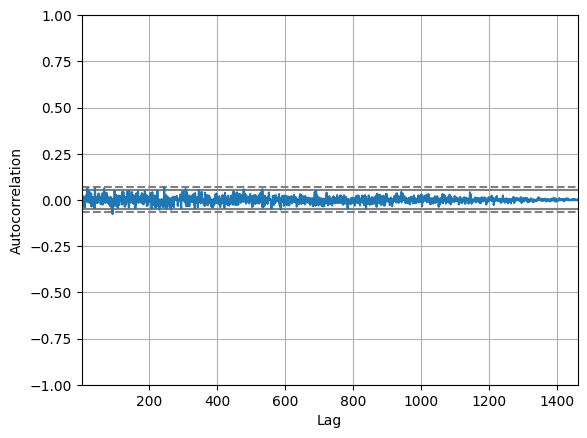

In [9]:
# Calculate correlation between numeric columns in df
print("Correlation matrix for numeric columns in df:")
display(df.select_dtypes(include=np.number).corr())

# Calculate correlation between specific columns
print("\nCorrelation between 'age' and 'income':")
display(df['age'].corr(df['income']))

# Calculate autocorrelation for a time series column in df_ts
# Ensure df_ts has a datetime index and is sorted by time
if not isinstance(df_ts.index, pd.DatetimeIndex):
    df_ts['date'] = pd.to_datetime(df_ts['date']) # Ensure 'date' is datetime
    df_ts.set_index('date', inplace=True)
df_ts.sort_index(inplace=True)

print("\nAutocorrelation of 'temperature' in df_ts (lag 1):")
display(df_ts['temperature'].autocorr())

# Autocorrelation for multiple lags (using pandas.plotting)
from pandas.plotting import autocorrelation_plot
print("\nAutocorrelation plot for 'temperature' in df_ts:")
autocorrelation_plot(df_ts['temperature'])

### Binning Continuous Data with `pd.cut()` and `pd.qcut()`

`pd.cut()` and `pd.qcut()` are powerful tools for transforming continuous variables into categorical ones by grouping values into bins.
*   `pd.cut()` bins data based on defined edges (intervals).
*   `pd.qcut()` bins data based on quantiles (each bin has roughly the same number of observations).

In [10]:
# Example using pd.cut on 'age'
# Define age bins and labels
age_bins = [0, 18, 35, 50, 100]
age_labels = ['Child', 'Young Adult', 'Middle Aged', 'Senior']
df['age_binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True) # right=True includes the right edge

print("Binning 'age' using pd.cut:")
display(df[['age', 'age_binned']].head())
display(df['age_binned'].value_counts())

# Example using pd.qcut on 'score'
# Bin 'score' into 4 quantiles
df['score_quartiles'] = pd.qcut(df['score'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

print("\nBinning 'score' using pd.qcut:")
display(df[['score', 'score_quartiles']].head())
display(df['score_quartiles'].value_counts())

Binning 'age' using pd.cut:


,age,age_binned
0,56,Senior
1,69,Senior
2,46,Middle Aged
3,32,Young Adult
4,60,Senior


,count
age_binned,
Senior,491
Middle Aged,259
Young Adult,242
Child,18



Binning 'score' using pd.qcut:


,score,score_quartiles
0,93.031888,Q4
1,25.305843,Q2
2,78.117042,Q4
3,82.513220,Q4
4,49.545210,Q2


,count
score_quartiles,
Q1,245
Q2,245
Q3,245
Q4,245


## Quick Reference Summary

Here is a quick reference summary of the key functions and concepts demonstrated in this notebook, organized by section:

**3.1 Installation & Import:**
* `import pandas as pd`, `import numpy as np`, `from datetime import datetime, timedelta`, `import random`
* Creating sample DataFrames (`pd.DataFrame`)

**3.2 Data Structures:**
* `pd.Series()`: Creating Series
* `pd.DataFrame()`: Creating DataFrames
* Accessing properties: `.values`, `.index`, `.dtype`, `.shape`, `.size`, `.ndim`
* DataFrame summaries: `.info()`, `.describe()`

**3.3 Reading & Writing Data:**
* Reading: `pd.read_csv()`, `pd.read_excel()`, `pd.read_json()`, `pd.read_sql()`, `pd.read_parquet()`, `pd.read_pickle()`, `pd.read_html()`
* Writing: `.to_csv()`, `.to_excel()`, `.to_json()`, `.to_html()`, `.to_parquet()`, `.to_pickle()`, `.to_sql()`

**3.4 Data Inspection:**
* Viewing data: `.head()`, `.tail()`, `.sample()`
* Summary information: `.info()`, `.describe()`, `.dtypes`, `.columns`
* Missing values: `.isnull()`, `.notnull()`, `.isnull().sum()`, `.isnull().any()`, `.isnull().all()`
* Unique values: `.nunique()`

**3.5 Data Selection & Indexing:**
* Column selection: `df['col']`, `df[['col1', 'col2']]`, `df.col`, `df.select_dtypes()`
* Row selection by position: `.iloc[]`
* Row selection by label: `.loc[]`
* Boolean indexing: `df[condition]`, `df[df['col'].isin([...)]`, `df[(cond1) & (cond2)]`, `df.query()`
* Single value access: `.at[]`, `.iat[]`

**3.6 Data Cleaning:**
* Missing values: `.isnull()`, `.notnull()`, `.isnull().sum()`, `.dropna()`, `.fillna()`, `.interpolate()`
* Duplicates: `.duplicated()`, `.drop_duplicates()`
* String operations (`.str` accessor): `.lower()`, `.upper()`, `.title()`, `.strip()`, `.replace()`, `.contains()`, `.startswith()`, `.endswith()`, `.len()`, `.split()`, `.extract()`

**3.7 Data Transformation:**
* Adding/Modifying Columns: Arithmetic operations (`df['new_col'] = ...`), `.apply()`, `np.where()`, `.assign()`, `.loc[condition, 'col'] = ...`

**3.8 Grouping and Aggregation:**
* Grouping: `.groupby()` (single or multiple columns)
* Aggregation functions: `.sum()`, `.mean()`, `.count()`, `.min()`, `.max()`, `.std()`, `.var()`, `.median()`, `.first()`, `.last()`
* Multiple aggregations: `.agg()` (list or dictionary)
* Custom aggregations: `.agg(lambda x: ...)`
* Pivot Tables: `pd.pivot_table()`
* Cross Tabulation: `pd.crosstab()`

**3.9 Merging and Joining:**
* Concatenation: `pd.concat()` (vertical and horizontal, `ignore_index`, `keys`)
* Merging: `pd.merge()` (`on`, `how`, `left_on`, `right_on`, `left_index`, `right_index`)
* Joining: `.join()` (`how`, `lsuffix`, `rsuffix`)

**3.10 Date and Time Operations:**
* Conversion: `pd.to_datetime()` (`format`, `errors`)
* Properties (`.dt` accessor): `.year`, `.month`, `.day`, `.dayofweek`, `.quarter`
* Time Series: `.set_index()`, `.resample()`, `.rolling()`, `.expanding()`

**3.11 Reshaping Data:**
* Wide to Long: `pd.melt()`
* Long to Wide: `.pivot()`, `pd.pivot_table()`
* Stack/Unstack: `.stack()`, `.unstack()`

**3.12 Performance Tips:**
* Memory Usage: `.info(memory_usage='deep')`, `.memory_usage(deep=True)`
* Data Type Optimization: `.astype()`, `'category'`
* Efficient Operations: Vectorization, `.query()`, `.eval()`
* Reading Large Files: `chunksize`, `usecols`

**3.13 Common Patterns for ML:**
* Feature Engineering: `pd.get_dummies()`, `pd.cut()`, `pd.qcut()`, `StandardScaler`
* Train-Test Split Preparation: Separating features/target (`.drop()`, `[]`), handling categoricals (`pd.get_dummies()`), handling missing values (`.fillna()`)
* Data Quality Checks: Shape, memory usage, missing values count, duplicate rows count, data types.

**3.14 Advanced Things:**
*   **Advanced Indexing - MultiIndex:** `pd.MultiIndex.from_tuples()`, `.loc[]` with multiple levels.
*   **More Advanced String Operations:** `.str.contains(regex=True)`, `.str.extract()`, `.str.replace()`, `.str.strip()`, `.str.lower()`.
*   **Working with Categorical Data:** `.astype('category')`, `.cat.categories`, `.cat.codes`, `pd.Categorical()`, `.value_counts()`.
*   **Method Chaining with `.pipe()`:** `.pipe()`.
*   **Expanding List-like Entries with `.explode()`:** `.explode()`.
*   **Correlation and Autocorrelation:** `.corr()`, `.autocorr()`, `autocorrelation_plot()`.
*   **Binning Continuous Data with `pd.cut()` and `pd.qcut()`:** `pd.cut()`, `pd.qcut()`.


---
---
**`Mirza Naeem Beg`**<br>
`Final Year UG Student,`<br>
`Dept. of CSE,` [**`AUST`**](https://aust.edu/)

[`Learn more about me;`](https://mirzanaeembeg.github.io/)
---
---
---